# Исследование факторов, влияющих на успешность видеоигр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Представлены данные до 2016 года. Необходимо спланировать кампанию на 2017-й год.

### Откройте файл с данными и изучите общую информацию

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [3]:
data = pd.read_csv('/datasets/games.csv')
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Подготовьте данные

#### Замените названия столбцов (приведите к нижнему регистру)

In [4]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Преобразуйте данные в нужные типы, обработайте пропуски при необходимости

Судя по общей информации по датафрейму, изменение типа данных нужно для столбцов "year_of_release" и "user_score".
Также, в нескольких столбцах есть пропущенные значения. В столбцах "name", "genre" и "year_of_release" пропуски скорее всего обусловлены ошибками выгрузки. Пропуски по первым двум предлагаю просто отбросить. По "year_of_release" опишу далее.

In [5]:
data = data.query('name == name')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


В столбцах "critic_score", "user_score" и "rating" пропуски скорее всего обусловлены отсутствием информации, нет оценок от критиков и пользователей, или игра не рейтинговалась. Данные пропуски стоит оставить, поскольку заполнение усредненными данными искривит статистику. Для корректной обработки данных, пропуски в "rating" заполню плейсхолдером.

In [6]:
data['rating'] = data['rating'].fillna('Unknown')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           16713 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


##### Столбец year_of_release

Для "year_of_release" адекватно изменение типа на "int" или "datetime". Изменим на "int", чтобы сохранить только год, при переводе в "datetime" появятся еще месяц и день. Проблема в том, что в этом столбце есть пропуски и при переводе в другой тип возникнет ошибка. Предлагаю эти строки просто отбросить, поскольку их немного (около 300), для дальнейшего анализа они по сути бесполезны и в целом их удаление не сильно скажется на статистике по продажам (далее привожу сумму по соответствующим столбцам в сравнении с суммой по строкам с пропущенным годом).

In [7]:
print(data['na_sales'].sum(), data['eu_sales'].sum(), data['jp_sales'].sum(), data['other_sales'].sum())
print(data.query('year_of_release != year_of_release')['na_sales'].sum(), data.query('year_of_release != year_of_release')['eu_sales'].sum(), data.query('year_of_release != year_of_release')['jp_sales'].sum(), data.query('year_of_release != year_of_release')['other_sales'].sum())

4400.570000000001 2424.1400000000003 1297.34 791.2400000000001
59.15 24.46 6.699999999999999 8.610000000000003


In [8]:
data = data.query('year_of_release == year_of_release')
data['year_of_release'] = data['year_of_release'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


##### Столбец user_score

В столбце "user_score" кроме значений рейтинга и пропущенных есть отметка "tbd" - по этим играм оценка еще не выставлена. Для целей исследовательского анализа эта отметка тождественна отсутствующей оценке, поэтому при приведении столбца к числовому, предлагаю эти значения заменить NaN. Для проверки корректности замены, посчитаем сколько этих значений в столбце.

In [9]:
data.query('user_score == "tbd"')['user_score'].describe()

count     2376
unique       1
top        tbd
freq      2376
Name: user_score, dtype: object

In [10]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data = data.reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Перевод в числовой формат успешен, сумма текущего количества заполненных строк и количества значений "tbd" в столбце сходится с количеством заполненных строк ранее.

#### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец

In [11]:
data['summary_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summary_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


#### Проверка на дубликаты

In [12]:
data.duplicated().sum()

0

Дубликаты отсутствуют.

### Проведите исследовательский анализ данных

#### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

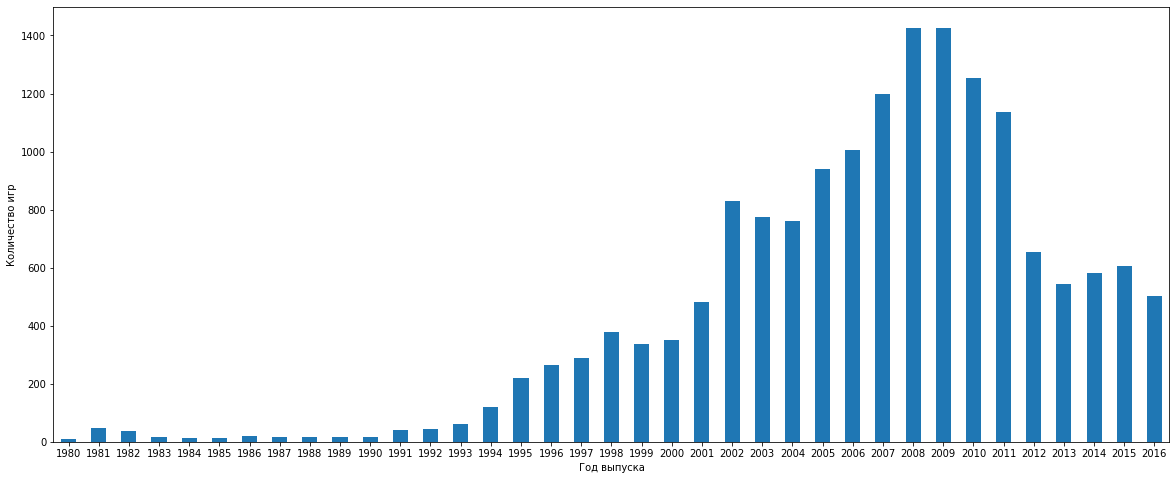

In [13]:
data.groupby('year_of_release')['name'].count().plot(kind='bar', figsize=(20,8))
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.xticks(rotation = 0)
plt.show()

Видно, что с начала девяностых, количество выпускаемых игр стабильно повышается вплоть до пика в 2008-2009 гг., после чего за 2 года резко падает в 2 раза. Верятно, так сказывается влияние экономического кризиса, пришедшегося на эти годы. Для данного исследования, думаю, будут важны данные за последние 4-5 лет, когда количество выпускаемых игр стабилизировалось.

#### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

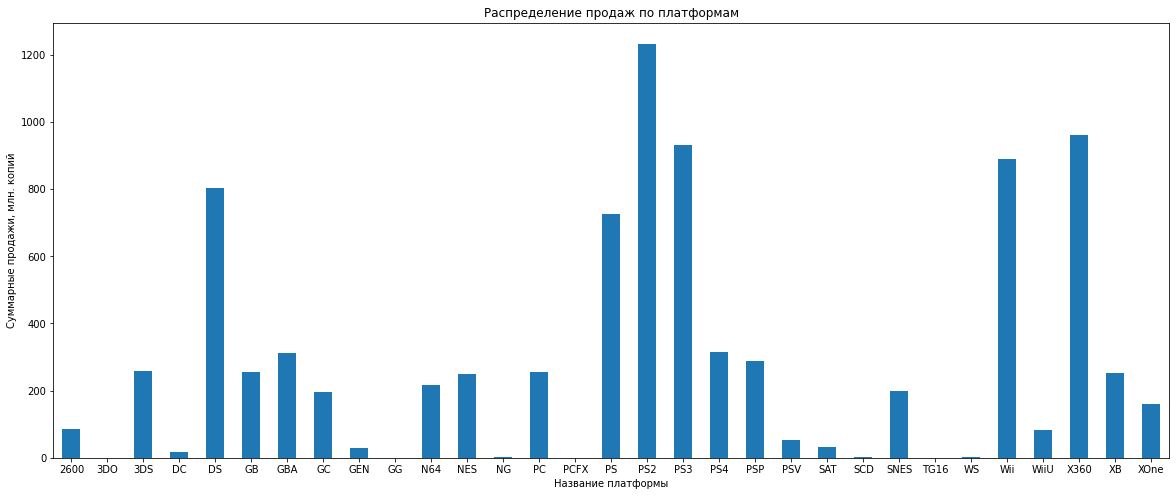

In [14]:
data.groupby('platform')['summary_sales'].sum().plot(kind='bar', figsize=(20,8))
plt.xlabel('Название платформы')
plt.ylabel('Суммарные продажи, млн. копий')
plt.title('Распределение продаж по платформам')
plt.xticks(rotation = 0)
plt.show()

По общим продажам видны 5 выраженных лидеров:
- три поколения консолей PlayStation;
- "домашняя" консоль от Nintendo - Wii;
- портативная консоль от Nintendo - DS;
- второе поколение Xbox - Xbox360.

Посмотрим, как их продажи распределились по годам.

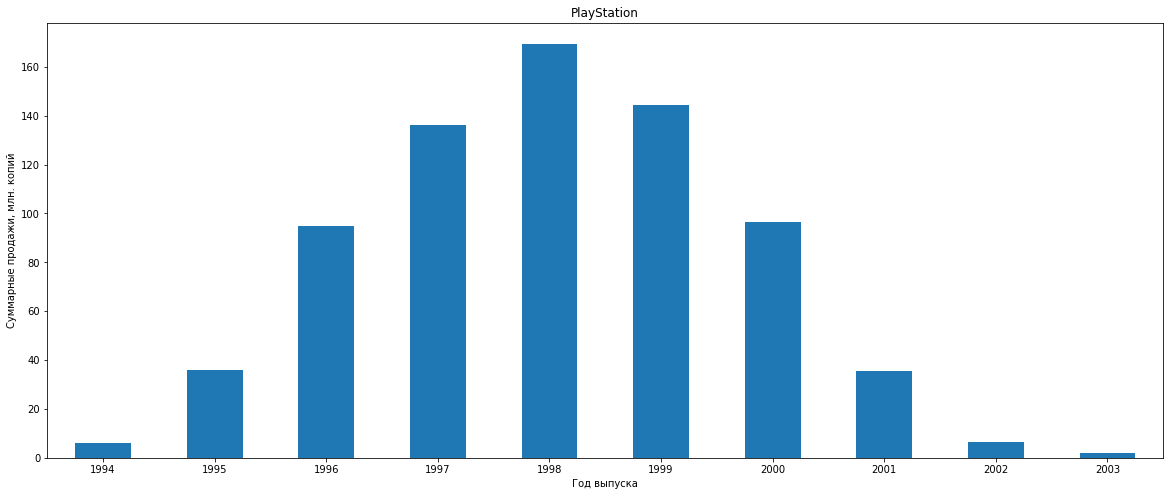

In [15]:
data.query('platform == "PS"').groupby('year_of_release')['summary_sales'].sum().plot(kind='bar', figsize=(20,8))
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи, млн. копий')
plt.title('PlayStation')
plt.xticks(rotation = 0)
plt.show()

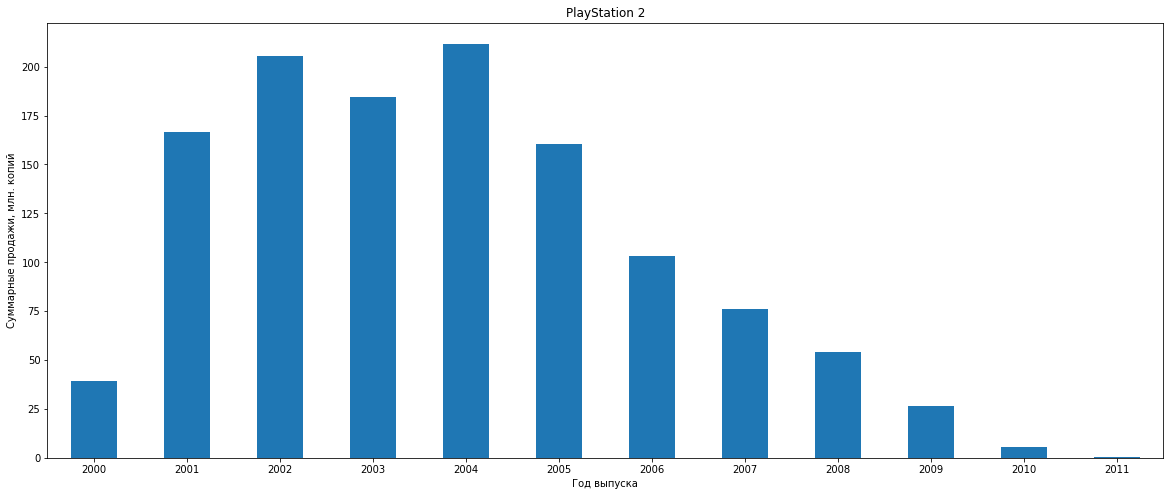

In [16]:
data.query('platform == "PS2"').groupby('year_of_release')['summary_sales'].sum().plot(kind='bar', figsize=(20,8))
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи, млн. копий')
plt.title('PlayStation 2')
plt.xticks(rotation = 0)
plt.show()

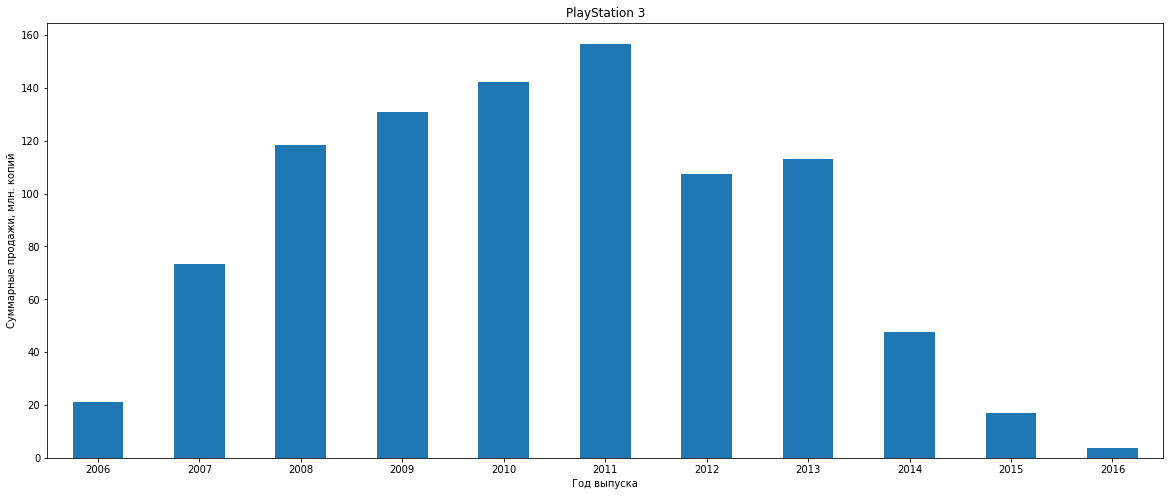

In [17]:
data.query('platform == "PS3"').groupby('year_of_release')['summary_sales'].sum().plot(kind='bar', figsize=(20,8))
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи, млн. копий')
plt.title('PlayStation 3')
plt.xticks(rotation = 0)
plt.show()

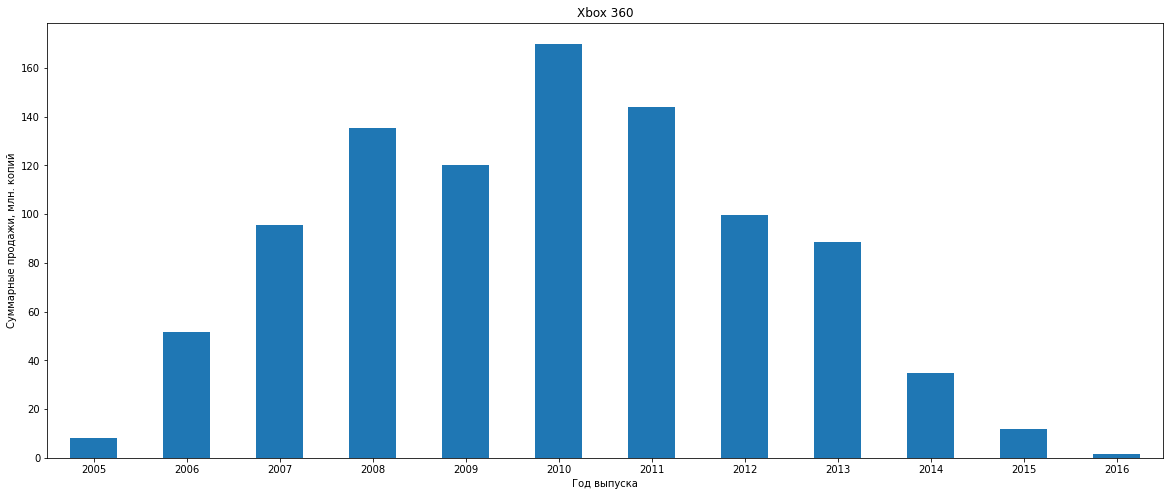

In [18]:
data.query('platform == "X360"').groupby('year_of_release')['summary_sales'].sum().plot(kind='bar', figsize=(20,8))
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи, млн. копий')
plt.title('Xbox 360')
plt.xticks(rotation = 0)
plt.show()

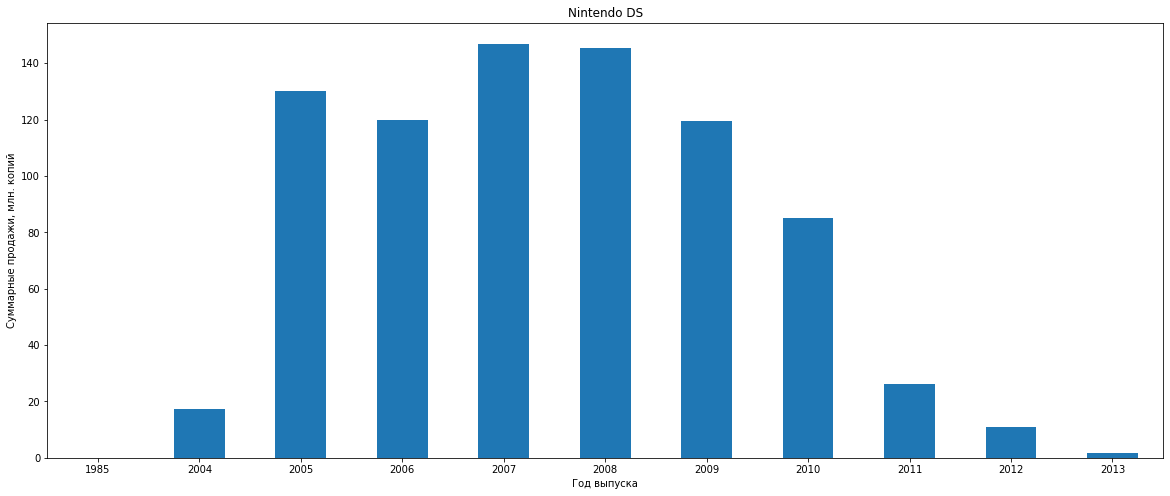

In [19]:
data.query('platform == "DS"').groupby('year_of_release')['summary_sales'].sum().plot(kind='bar', figsize=(20,8))
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи, млн. копий')
plt.title('Nintendo DS')
plt.xticks(rotation = 0)
plt.show()

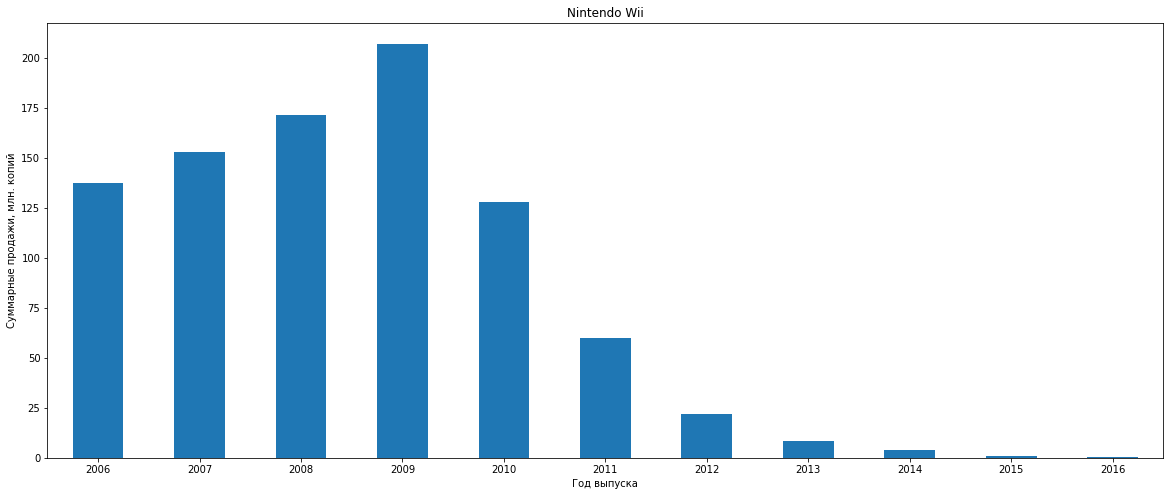

In [20]:
data.query('platform == "Wii"').groupby('year_of_release')['summary_sales'].sum().plot(kind='bar', figsize=(20,8))
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи, млн. копий')
plt.title('Nintendo Wii')
plt.xticks(rotation = 0)
plt.show()

Заметно, что чаще всего в первый год выхода новые платформы сначала "разгоняются", продажи игр на них умеренны, думаю, одна из причин этого - выход новых устройств часто приходится на конец года (исключение - PlayStation 2, вышедшая в марте 2000 г., но и продажи в первый год выше, чем у других поколений этой консоли), также, пользователи, уже имеющие аналогичные устройства предыдущих поколений часто решают повременить с покупкой новых устройств до получения обратной связи от более расторопных пользователей. В этой части среди 5 выбранных платформ выделяется Wii, которая сразу после запуска в декабре 2006 г. показала очень высокие продажи, но здесь, как мне кажется причина кроется в том числе в том, что в комплекте с ней во всех регионах, кроме Японии, шла игра Wii Sports, что обеспечило игре гарантированные продажи.

На примере 5 этих платформ видно, что в среднем, жизненный цикл их составляет 7-8 лет, после чего продажи заметно падают. Поищем подтверждение этому по распределению выхода игр на всеж платформах в целом.

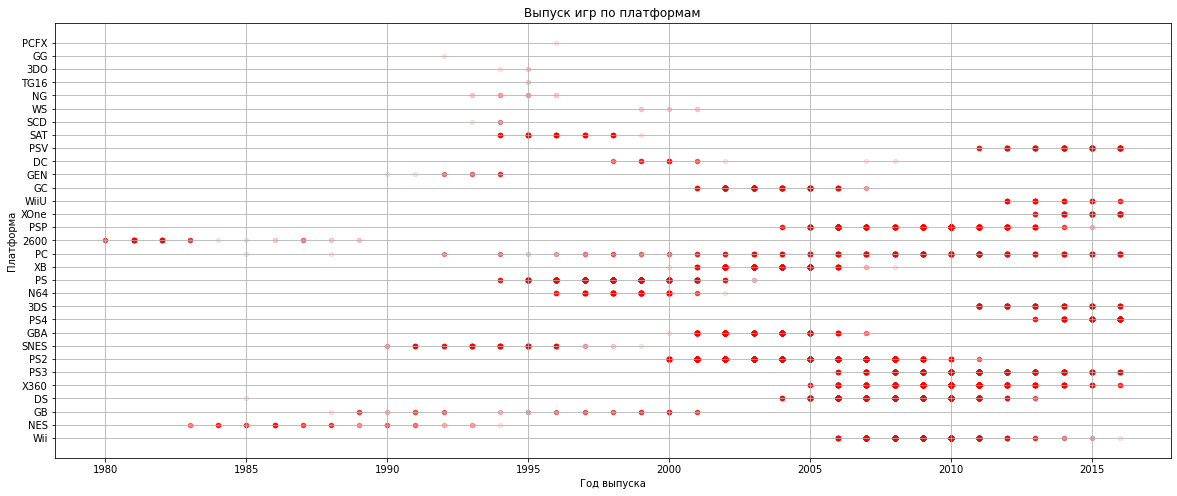

In [21]:
data.plot(x='year_of_release', y='platform', kind='scatter', figsize=(20,8), grid=True, alpha=0.1, color='red')
plt.xlabel('Год выпуска')
plt.ylabel('Платформа')
plt.title('Выпуск игр по платформам')
plt.xticks(rotation = 0)
plt.show()

В целом, значение в 8 лет подтверждается, для каких-то консолей срок жизни чуть меньше (первое поколение Xbox), для каких-то чуть больше (Playstation 2). Среди всех платформ выделяется PC, но это объясняется отсутствием привязки к аппаратной части.
С учетом этого, предлагаю взять в качестве актуального периода 4 года, поскольку этот период захватит начало или большую часть жизненного цикла актуальных на данный момент платформ (Playstation 4, Playstation Vita, Nintendo 3DS, Xbox One), захватит переходный период обновления поколений консолей, что полезно для анализа жанров, а также поможет скомпенсировать неполные данные за 2016 год.

Выделим этот период в отдельный датафрейм.

In [22]:
actual_data = data.query('year_of_release >= 2013').reset_index(drop=True)
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  summary_sales    2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 209.5+ KB


#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

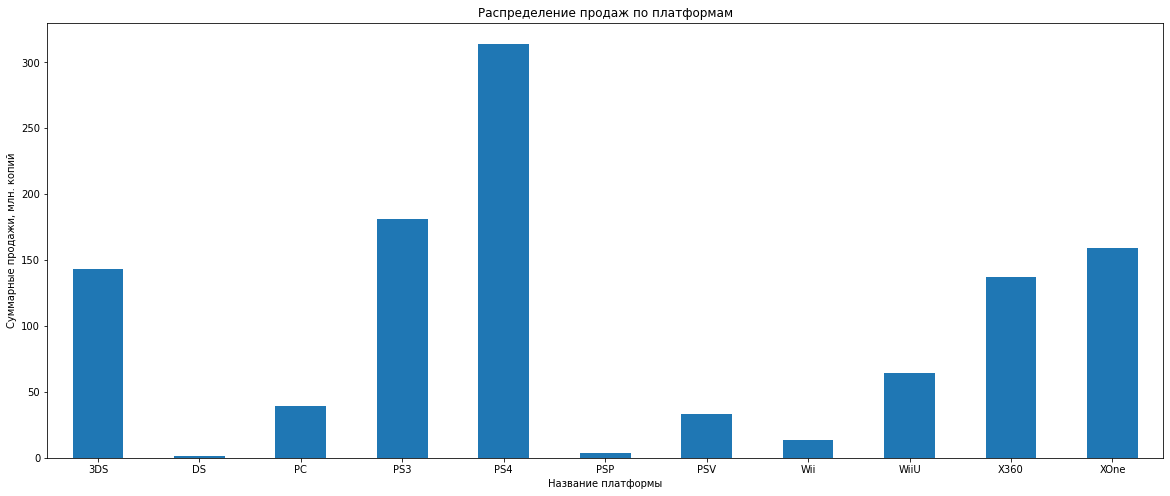

In [23]:
actual_data.groupby('platform')['summary_sales'].sum().plot(kind='bar', figsize=(20,8))
plt.xlabel('Название платформы')
plt.ylabel('Суммарные продажи, млн. копий')
plt.title('Распределение продаж по платформам')
plt.xticks(rotation = 0)
plt.show()

Самыми прибыльными платформами в рассматриваемый период были PlayStation 4, PlayStation 3, Xbox One, Xbox 360, Nintendo 3DS. Они с заметным отрывом опережают остальных по продажам. Посмотрим продажи по годам отдельно по платформам.

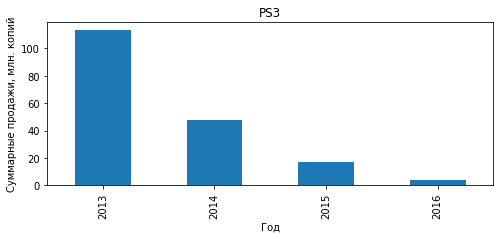

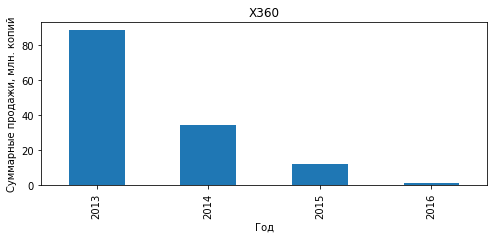

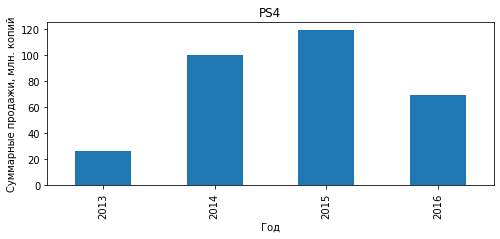

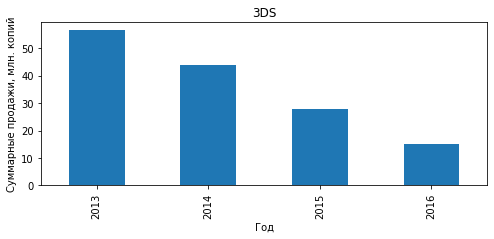

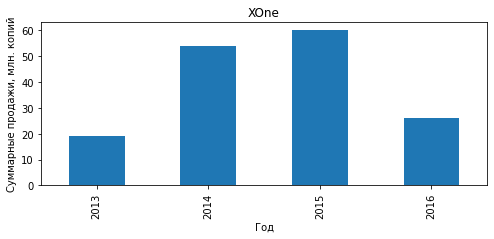

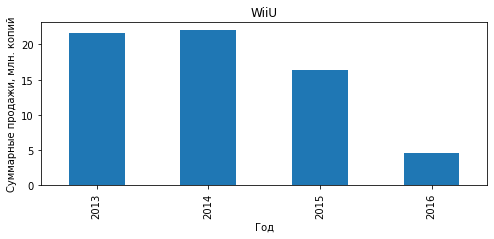

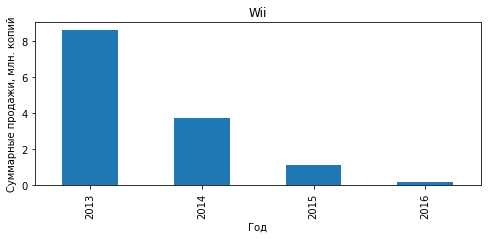

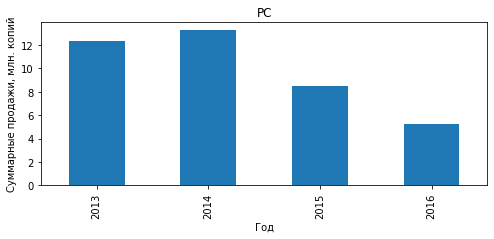

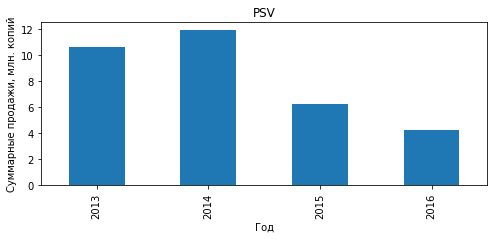

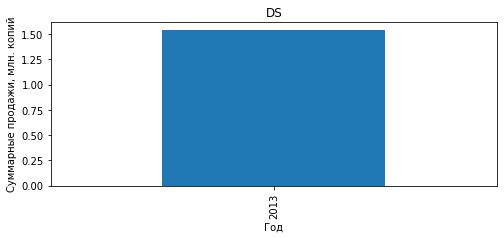

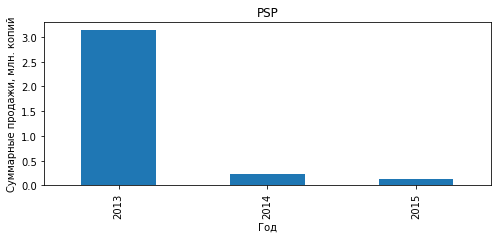

In [24]:
for i in actual_data['platform'].unique():
    fig, ax = plt.subplots(figsize=(20,8))
    actual_data.query('platform == @i').groupby('year_of_release')['summary_sales'].sum().plot(kind='bar', figsize=(8,3))
    plt.xlabel('Год')
    plt.ylabel('Суммарные продажи, млн. копий')
    plt.title(i)
    plt.show()

Две платформы на момент исследования определенно закончили свой жизненный цикл - Nintendo DS и PlayStation Portable.

PlayStation 3, Xbox 360 и Wii свой жизненный путь заканчивают - продажи на них стабильно сходят на нет к 2016 году.

Nintendo 3DS, PlayStation Vita и WiiU свой пик популярности уже прошли и их продажи падают, но все еще не на нуле.

На платформе PC в 2015 году заметно падение продаж по сравнению с 2 предыдущими годами, и, учитывая уже накопившийся показатель 2016 года, ясно, что ее популярность упала.

Только 2 платформы стабильно растут - PlayStation 4 и Xbox One, а учитывая исторические показатели их "старших братьев" PlayStation 3 и Xbox 360, можно расчитывать, что конец 2016 года может сравнять показатели продаж с 2015.

Думаю, самыми прибыльными платформами в 2017 будут именно они, даже учитывая возможное падение продаж по аналогии с их платформами-предшественниками.

#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

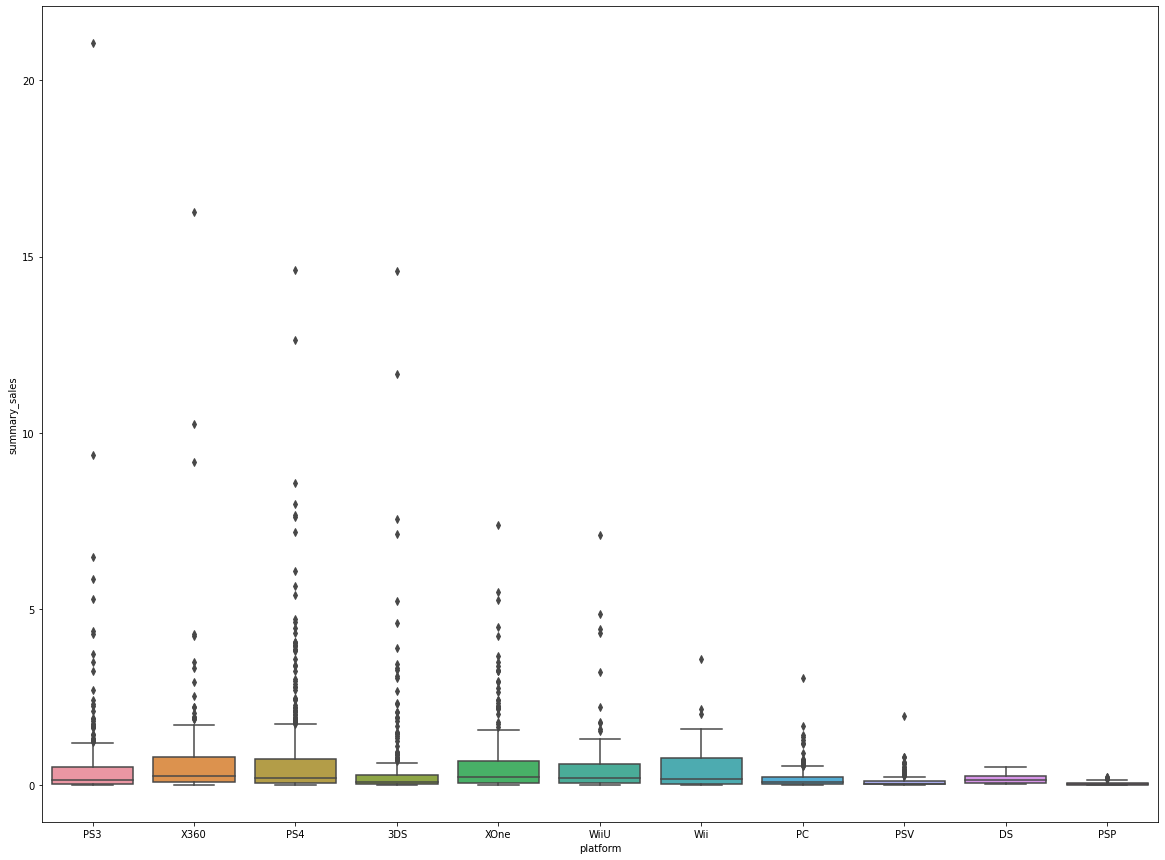

In [25]:
plt.rcParams['figure.figsize'] = (20,15)
sns.boxplot(x=actual_data['platform'], y=actual_data['summary_sales'])
plt.show()

Заметно, что чем менее популярна платформа и чем ближе она к концу своего жизненного цикла, тем меньше игр выходят за границы интервала 1,5IQR. При сравнении двух актуальных, растущих платформ PlayStation 4 и Xbox One, заметно, что на первой явно больше "выдающихся" игр и максимальные продажи больше в два раза, несмотря на практически одинаковый порог 1,5IQR.

#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Возьмем для рассмотрения PlayStation 4, поскольку это одна из двух выделенных мной платформ и общие продажи по ней больше остальных платформ.

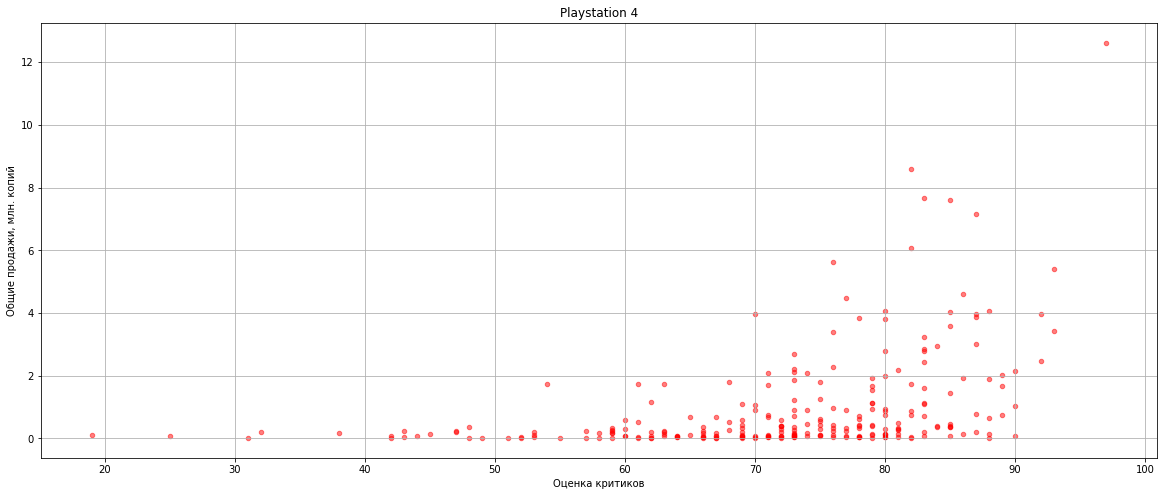

0.40656790206178095

In [26]:
actual_data.query('platform == "PS4"').plot(x='critic_score', y='summary_sales', kind='scatter', figsize=(20,8), grid=True, alpha=0.5, color='red')
plt.xlabel('Оценка критиков')
plt.ylabel('Общие продажи, млн. копий')
plt.title('Playstation 4')
plt.xticks(rotation = 0)
plt.show()
actual_data.query('platform == "PS4"')['critic_score'].corr(actual_data.query('platform == "PS4"')['summary_sales'])

Видно, что несмотря на большое количество игр с маленькими продажами, корреляция между оценками критиков и общими продажами есть, по мере увеличения оценок критиков, все больше игр показывают хорошие продажи. Скорее всего сказывается эффект того, что эти оценки выставляются до выхода игры и влияют на продажи игры.

Коэффициент корреляции это подтверждает, пусть он и не высокий, но определенную связь показывает.

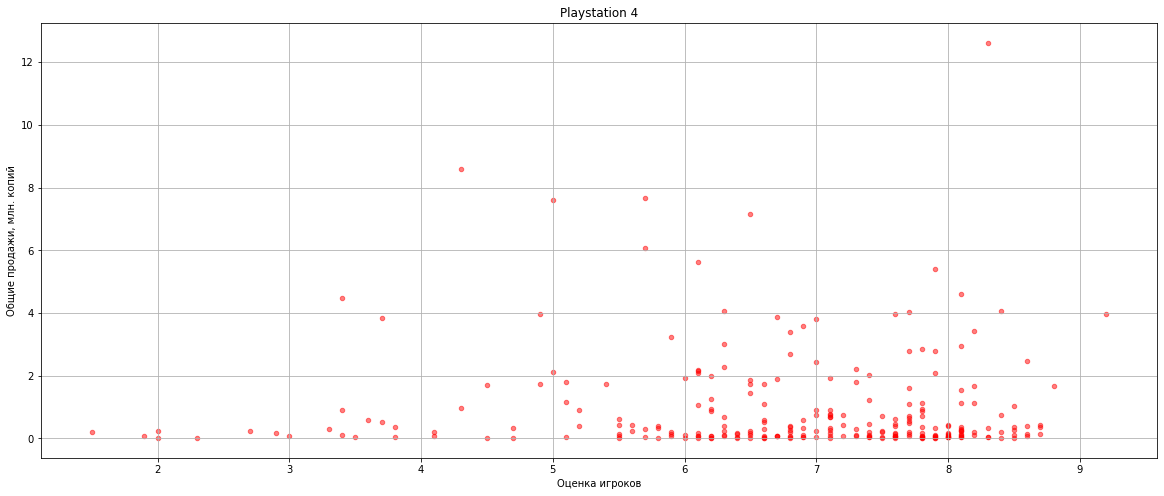

-0.031957110204556376

In [27]:
actual_data.query('platform == "PS4"').plot(x='user_score', y='summary_sales', kind='scatter', figsize=(20,8), grid=True, alpha=0.5, color='red')
plt.xlabel('Оценка игроков')
plt.ylabel('Общие продажи, млн. копий')
plt.title('Playstation 4')
plt.xticks(rotation = 0)
plt.show()
actual_data.query('platform == "PS4"')['user_score'].corr(actual_data.query('platform == "PS4"')['summary_sales'])

С оценками пользователей по другому, хорошо продаваемые игры часто имеют невысокие оценки и в целом график какой-то закономерности не показывает. В отличие от критиков, пользователи оценивают игру уже после покупки и не свершившиеся ожидания дают в результате плохие оценки.

Коэффициент корреляции показывает, что связи практически нет.

#### Соотнесите выводы с продажами игр на других платформах.

Посмотрим на другие платформы, но исключим из списка Wii, PSP и DS ввиду малого количества игр.

Сначала оценки критиков.

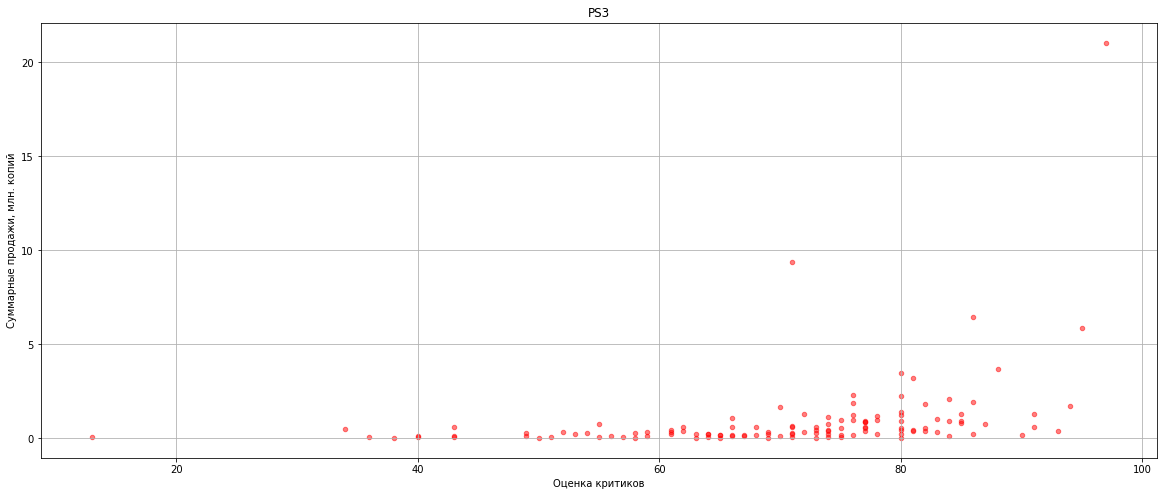

Коэффициент корреляции для PS3 0.3342853393371919


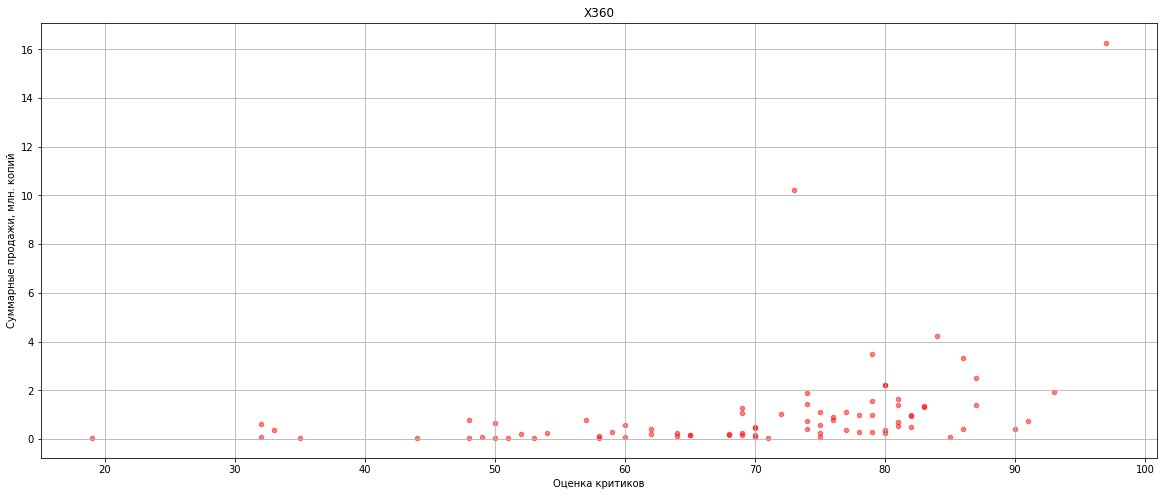

Коэффициент корреляции для X360 0.3503445460228664


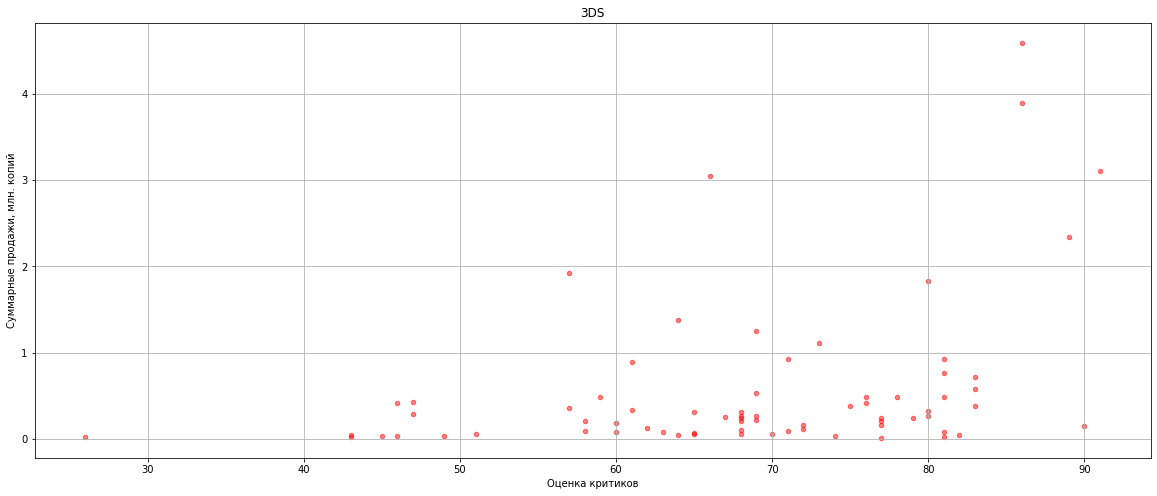

Коэффициент корреляции для 3DS 0.3570566142288103


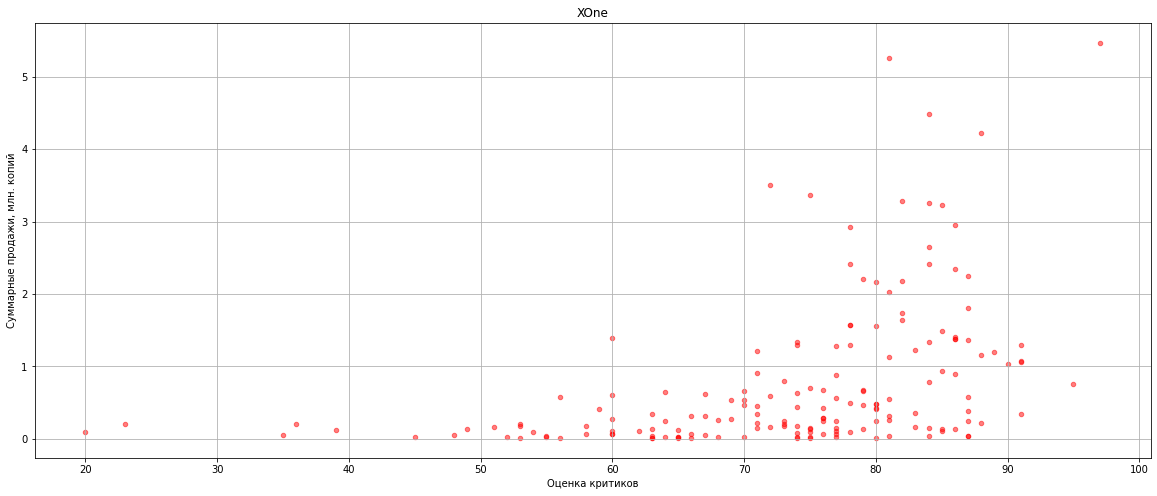

Коэффициент корреляции для XOne 0.4169983280084017


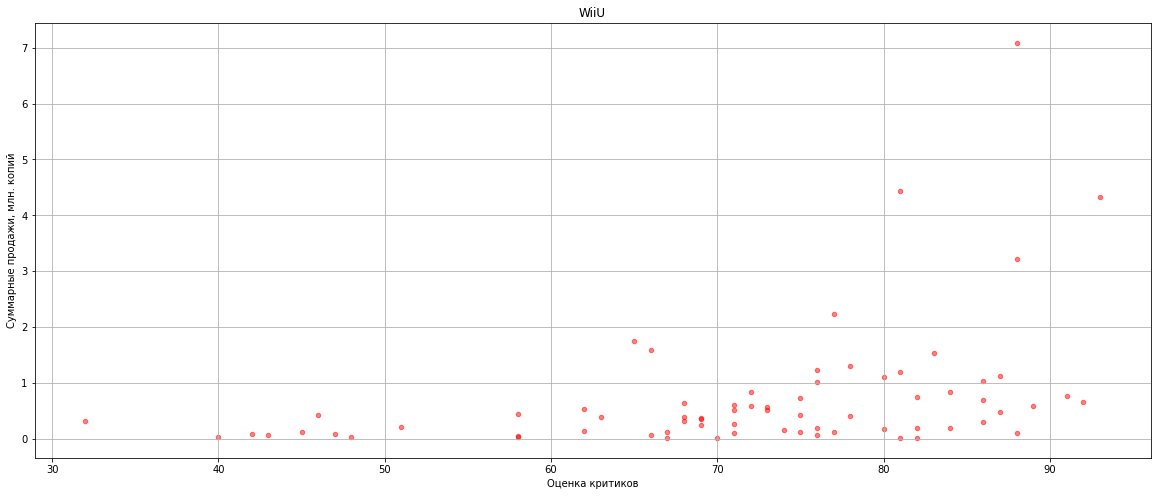

Коэффициент корреляции для WiiU 0.3764149065423912


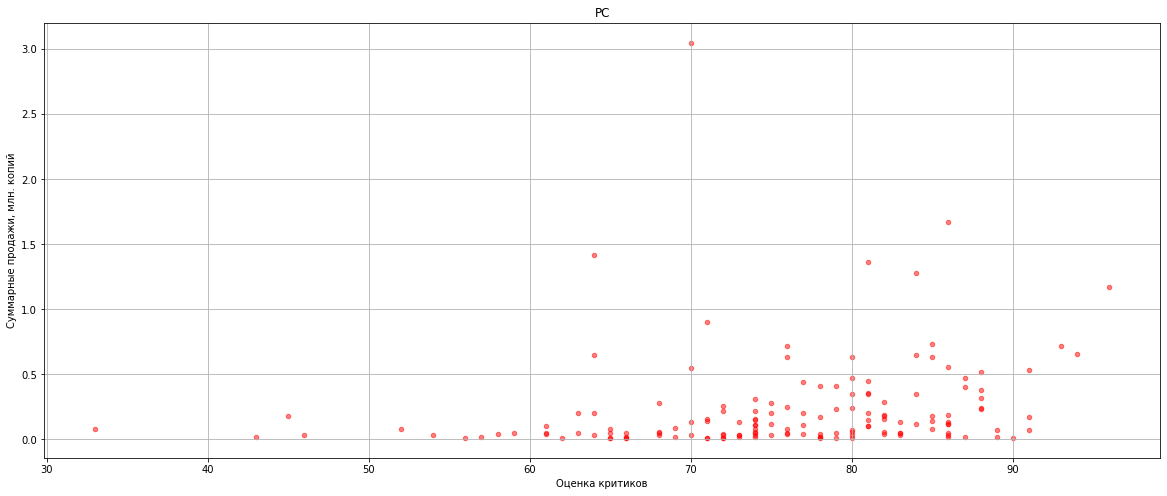

Коэффициент корреляции для PC 0.19603028294369382


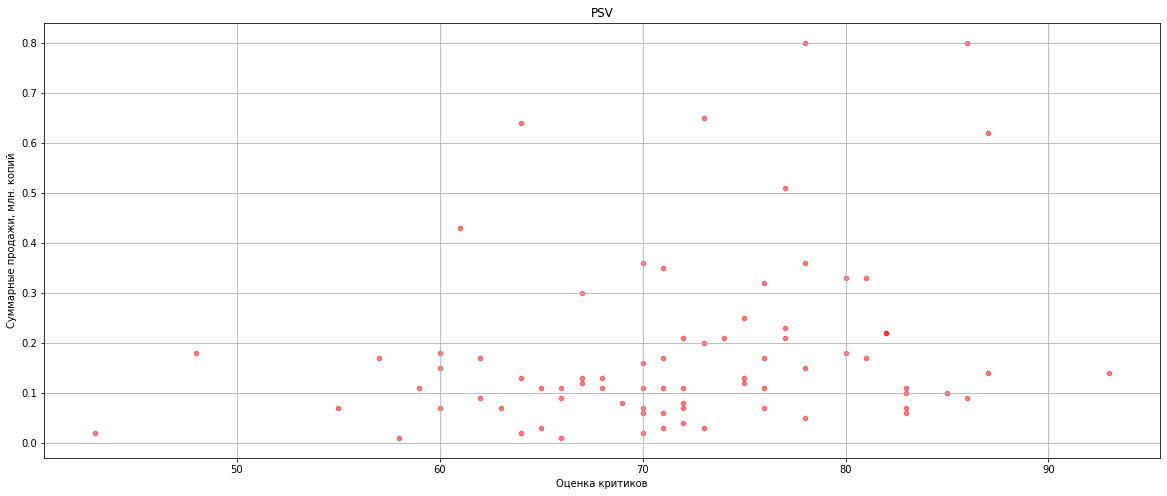

Коэффициент корреляции для PSV 0.2547423503068656


In [28]:
for i in ['PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV']:
    actual_data.query('platform == @i').plot(x='critic_score', y='summary_sales', kind='scatter', figsize=(20,8), grid=True, alpha=0.5, color='red')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Суммарные продажи, млн. копий')
    plt.title(i)
    plt.show()
    print('Коэффициент корреляции для', i, actual_data.query('platform == @i')['critic_score'].corr(actual_data.query('platform == @i')['summary_sales']))

В целом, вывод, сделанный ранее, подтверждается, корреляция оценок критиков и продаж есть и в большинстве случаев ее коэффициент близок к расчитанному ранее 0,4. Исключение - PC и PlayStation Vita, у них корреляция ниже, но все равно остается.

Теперь оценки игроков.

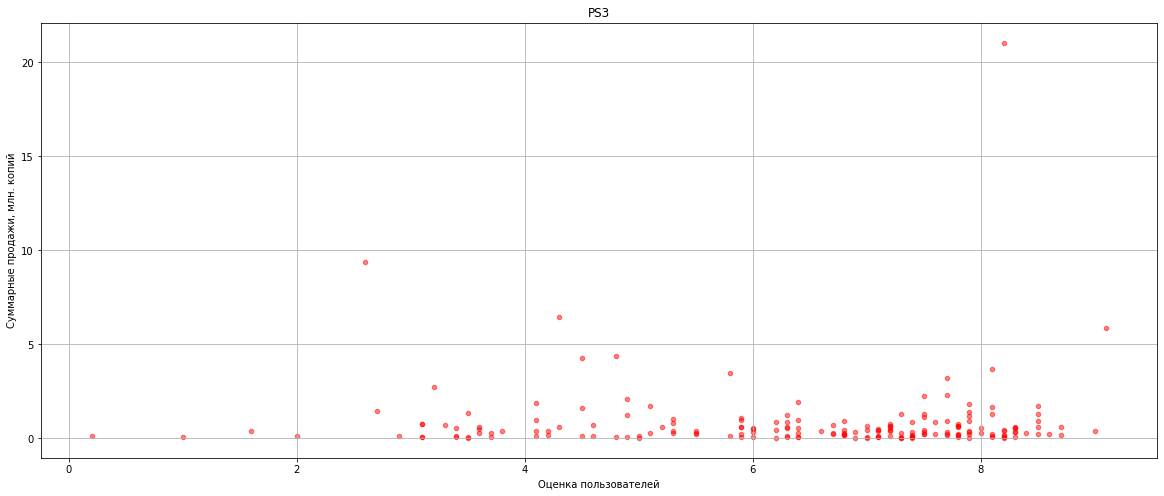

Коэффициент корреляции для PS3 0.0023944027357566925


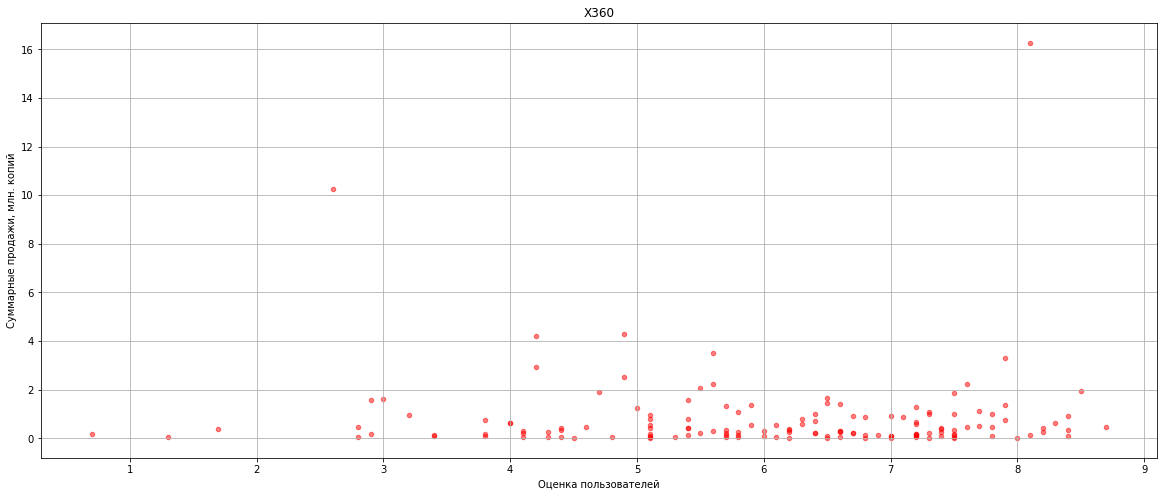

Коэффициент корреляции для X360 -0.011742185147181342


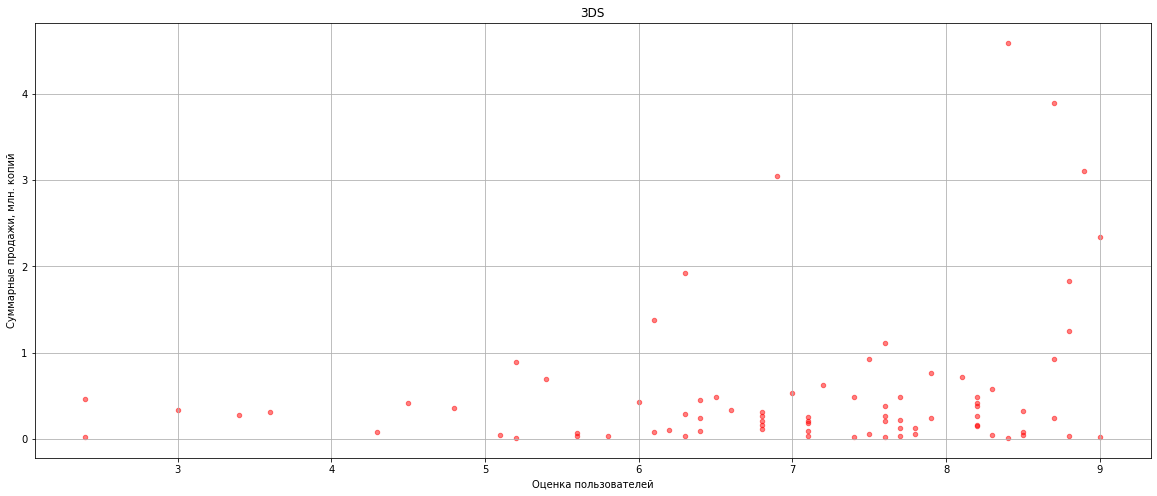

Коэффициент корреляции для 3DS 0.24150411773563016


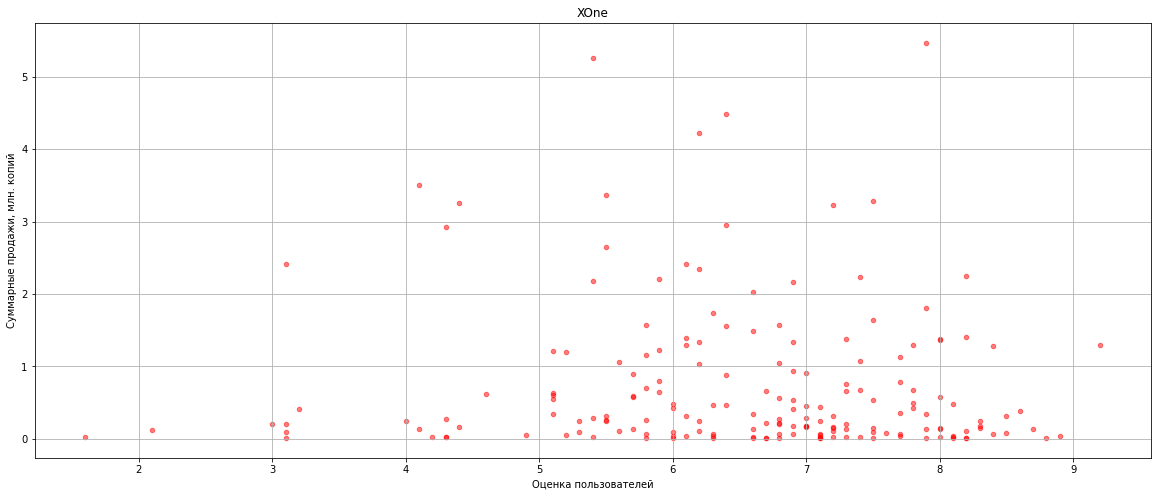

Коэффициент корреляции для XOne -0.06892505328279414


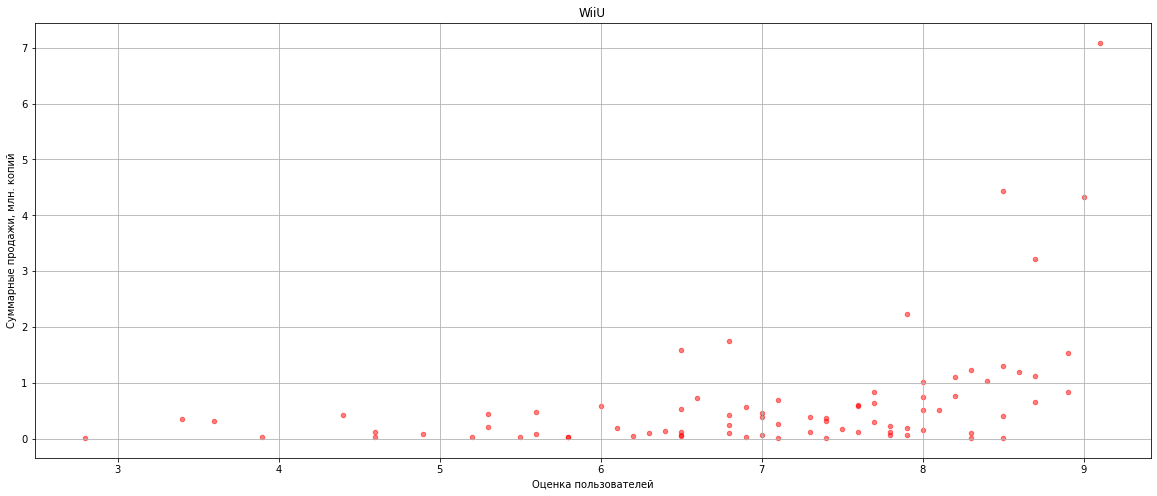

Коэффициент корреляции для WiiU 0.4193304819266187


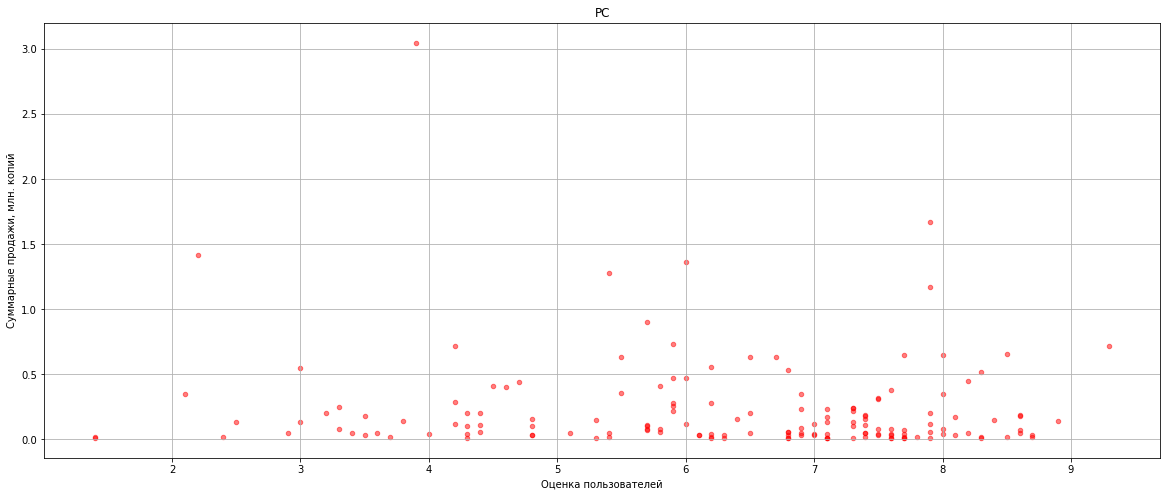

Коэффициент корреляции для PC -0.0938418695247674


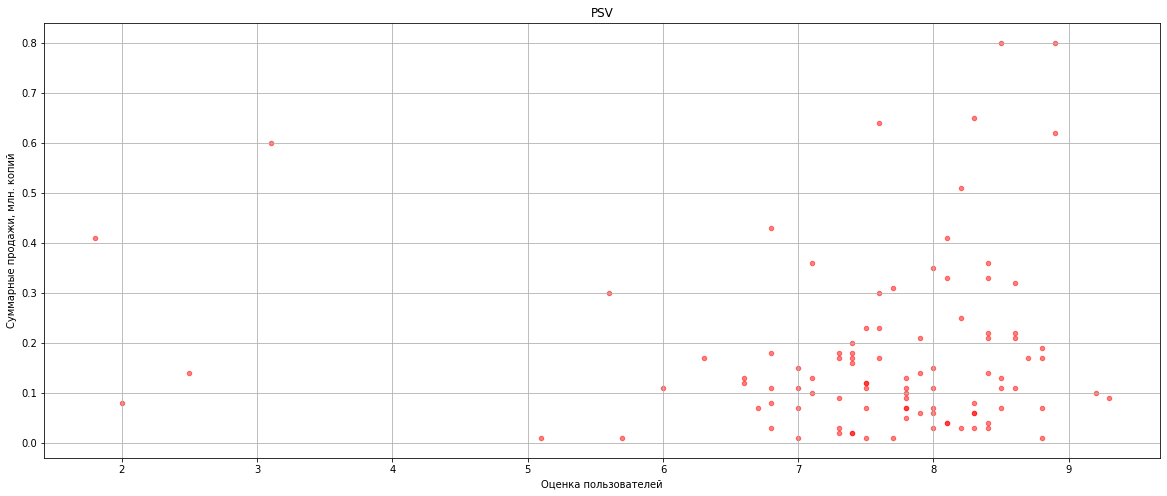

Коэффициент корреляции для PSV 0.0009424723319108626


In [29]:
for i in ['PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV']:
    actual_data.query('platform == @i').plot(x='user_score', y='summary_sales', kind='scatter', figsize=(20,8), grid=True, alpha=0.5, color='red')
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Суммарные продажи, млн. копий')
    plt.title(i)
    plt.show()
    print('Коэффициент корреляции для', i, actual_data.query('platform == @i')['user_score'].corr(actual_data.query('platform == @i')['summary_sales']))

В большинстве случаев ситуация сохраняется, ни визуально, ни по коэффициенту корреляции нет. Исключение - платформы Nintendo - 3DS и WiiU, в обоих случаях корреляция есть и даже близка к показателю коррекляции оценок критиков. Вероятно, на этих платформах есть тесные сообщества пользователей, которые следят за оценка друг-друга и стараются покупать высоко оцененные игры.

#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

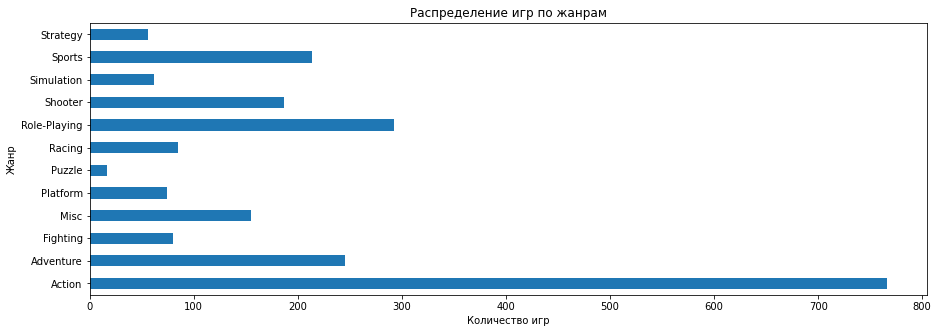

In [30]:
actual_data.groupby('genre')['name'].count().plot(kind='barh', figsize=(15,5))
plt.xlabel('Количество игр')
plt.ylabel('Жанр')
plt.title('Распределение игр по жанрам')
plt.show()

Больше всего (с сильным отрывом) за рассматриваемый период вышло игр в жанре Action, на втором месте, но почти в два раза меньше по количеству - Role-Playing, далее с похожими между собой показателями - Adventure, Sports и Shooter. Остальные жанры представлены заметно меньше.

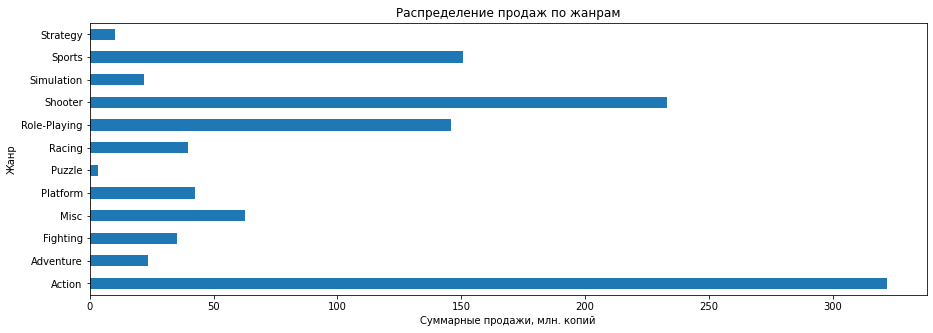

In [31]:
actual_data.groupby('genre')['summary_sales'].sum().plot(kind='barh', figsize=(15,5))
plt.xlabel('Суммарные продажи, млн. копий')
plt.ylabel('Жанр')
plt.title('Распределение продаж по жанрам')
plt.show()

По продажам также лидируют Action, что не удивительно, учитывая их количество, а вот Shooter уже на втором месте с уже сопоставимыми показателями. Role-Playing и Sports далее идут рядом, а вот большой по количеству игр Adventure приносит мало продаж.

Но стоит все таки посмотреть на прибыльность и попробовать оценить продажи на игру в среднем.

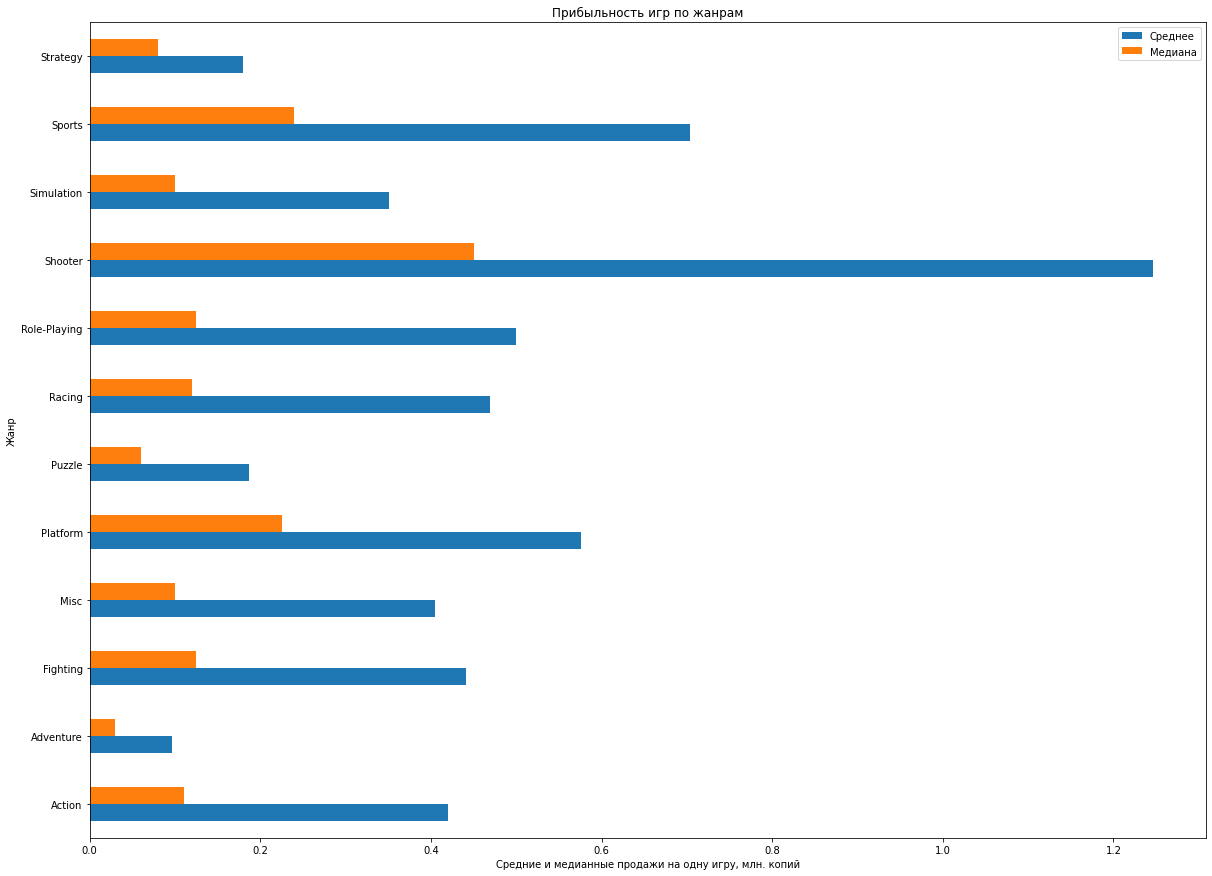

In [32]:
actual_data.pivot_table(index='genre', values=['summary_sales'], aggfunc=['mean', 'median']).plot(kind='barh')
plt.xlabel('Средние и медианные продажи на одну игру, млн. копий')
plt.ylabel('Жанр')
plt.title('Прибыльность игр по жанрам')
plt.legend(['Среднее', 'Медиана'])
plt.show()

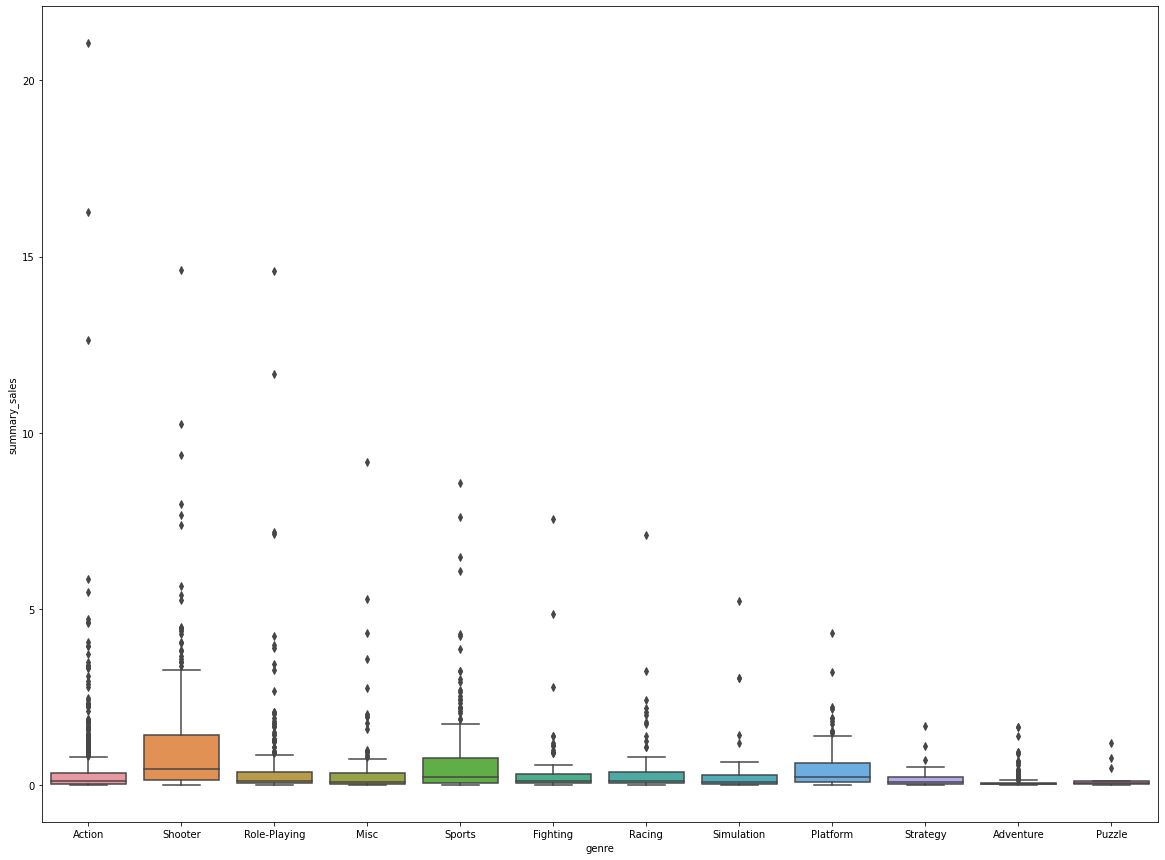

In [33]:
plt.rcParams['figure.figsize'] = (20,15)
sns.boxplot(x=actual_data['genre'], y=actual_data['summary_sales'])
plt.show()

Хорошо видно, что самыми результативными являются игры жанра Shooter, в среднем на каждую игру приходится более миллиона продаж, на втором месте Sports, с почти в два раза меньшим показателем. Возглавляет плотную группу "середняков" жанр Platform.

Самую плохую прибыльность с большим отставанием показывает жанр Adventure, похожие показатели у жанров Puzzle и Strategy.

### Составьте портрет пользователя каждого региона

Необходимо определить для пользователя каждого региона (Северная Америка, Европа, Япония):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

#### Популярные платформы

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


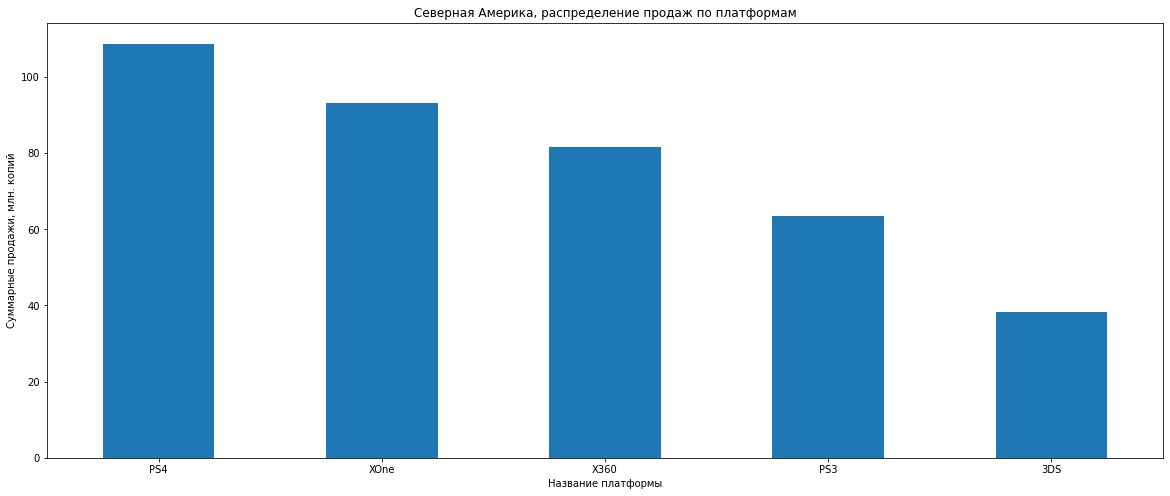

In [34]:
display(actual_data.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head())
actual_data.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head().plot(kind='bar', figsize=(20,8), legend=False)
plt.xlabel('Название платформы')
plt.ylabel('Суммарные продажи, млн. копий')
plt.title('Северная Америка, распределение продаж по платформам')
plt.xticks(rotation = 0)
plt.show()

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


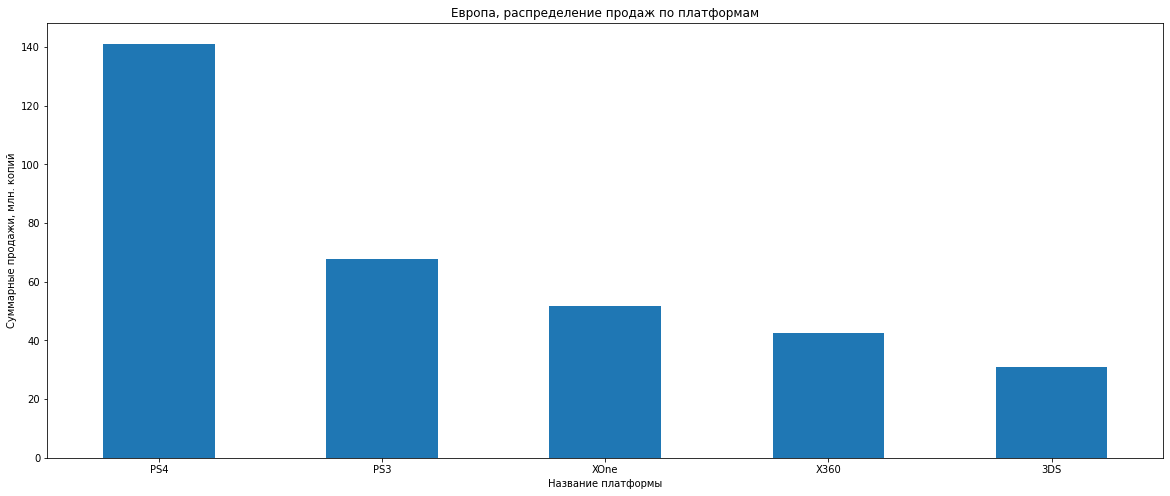

In [35]:
display(actual_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head())
actual_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head().plot(kind='bar', figsize=(20,8), legend=False)
plt.xlabel('Название платформы')
plt.ylabel('Суммарные продажи, млн. копий')
plt.title('Европа, распределение продаж по платформам')
plt.xticks(rotation = 0)
plt.show()

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


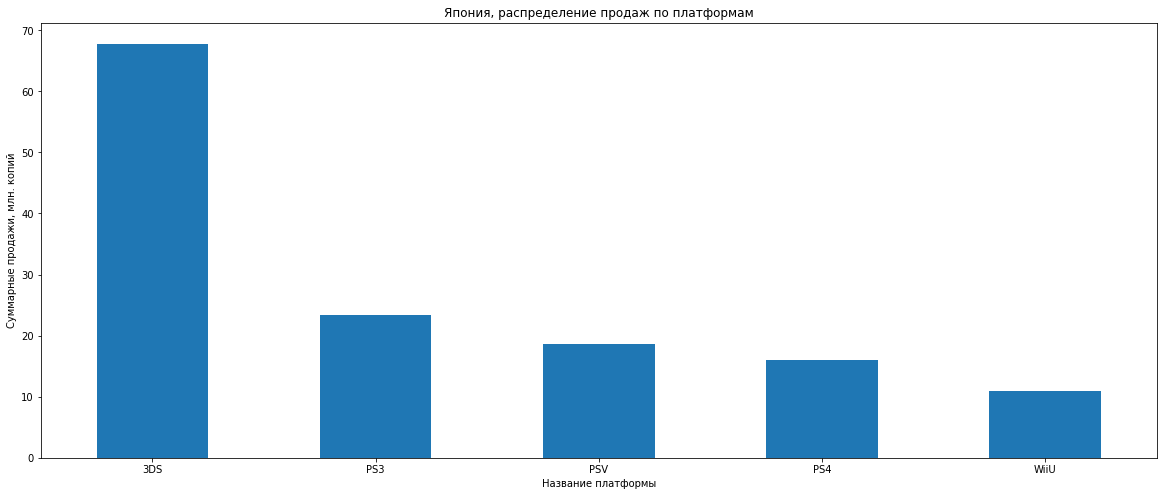

In [36]:
display(actual_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head())
actual_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head().plot(kind='bar', figsize=(20,8), legend=False)
plt.xlabel('Название платформы')
plt.ylabel('Суммарные продажи, млн. копий')
plt.title('Япония, распределение продаж по платформам')
plt.xticks(rotation = 0)
plt.show()

В Северной Америке первые четыре места по продажам занимают "домашние" системы. На первом месте актуальная PlayStation 4, сразу за ней с небольшим отставанием локальная Xbox One, после - две платформы прошлого поколения Xbox 360 и PlayStation 3. Замыкает пятерку портативная Nintendo 3DS.

В Европе на первом месте также PlayStation 4, но ее отрыв от второго места почти в два раза. При этом на втором месте на актуальная платформа, а система прошлого поколения PlayStation 3, которая обходит обе версии Xbox. На последнем месте также Nintendo 3DS.

В Японии картина сильно отличается. На первом месте с отрывом от второго почти в три раза портативная Nintendo 3DS. На втором PlayStation 3, только в этом регионе она обошла по продажам свою более новую версию. На третьем еще одна портативка PlayStation Vita, уже завершающая свой жизненный цикл. Четвертое место - PlayStation 4. На пятом WiiU, вошедшая в топ-5 только в этом регионе.

В целом, пользователи Северной Америки и Европы предпочитают выбирать для игр "домашние" платформы. При этом в Северной Америке стараются поодерживать локальные платформы, их продажи сопоставимы продажам по платформам из других стран. В Европе пользователи делают предпочтение платформе PlayStation, причем актуального поколения.

В Японии же, пользователи предпочитают портативные платформы, при этом в выборе могут вести себя консервативно, поддерживая не актуальные. Также заметно, что весь их топ-5 составляют платформы из Японии.

#### Популярные жанры

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


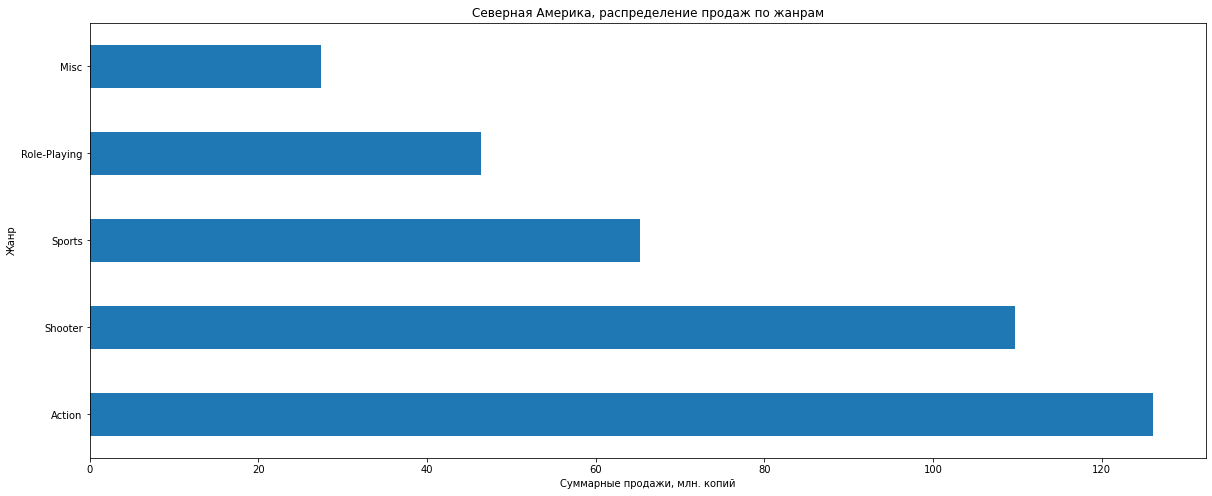

In [37]:
display(actual_data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head())
actual_data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head().plot(kind='barh', figsize=(20,8), legend=False)
plt.xlabel('Суммарные продажи, млн. копий')
plt.ylabel('Жанр')
plt.title('Северная Америка, распределение продаж по жанрам')
plt.xticks(rotation = 0)
plt.show()

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


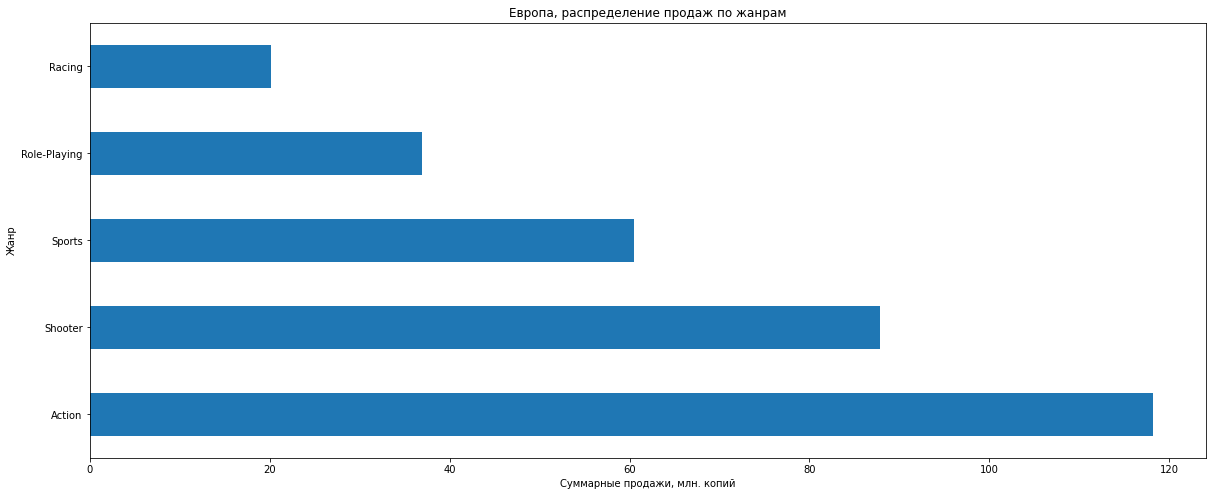

In [38]:
display(actual_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head())
actual_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head().plot(kind='barh', figsize=(20,8), legend=False)
plt.xlabel('Суммарные продажи, млн. копий')
plt.ylabel('Жанр')
plt.title('Европа, распределение продаж по жанрам')
plt.xticks(rotation = 0)
plt.show()

В Северной Америке и Европе очень похожие топ-5, даже большинство цифр по продажам похожи. На первом месте жанр Action, на втором Shooter (первое различие - в Америке их продажи лучше примерно на 20 млн. копий), третье - Sports, четвертое - Role-playing. На пятом месте разные категории, в Европе предпочитают Racing, а в Америке на пятое место вышла обобщенная категория Misc. Давайте посмотрим, какой будет топ-5 без нее.

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Platform,18.14


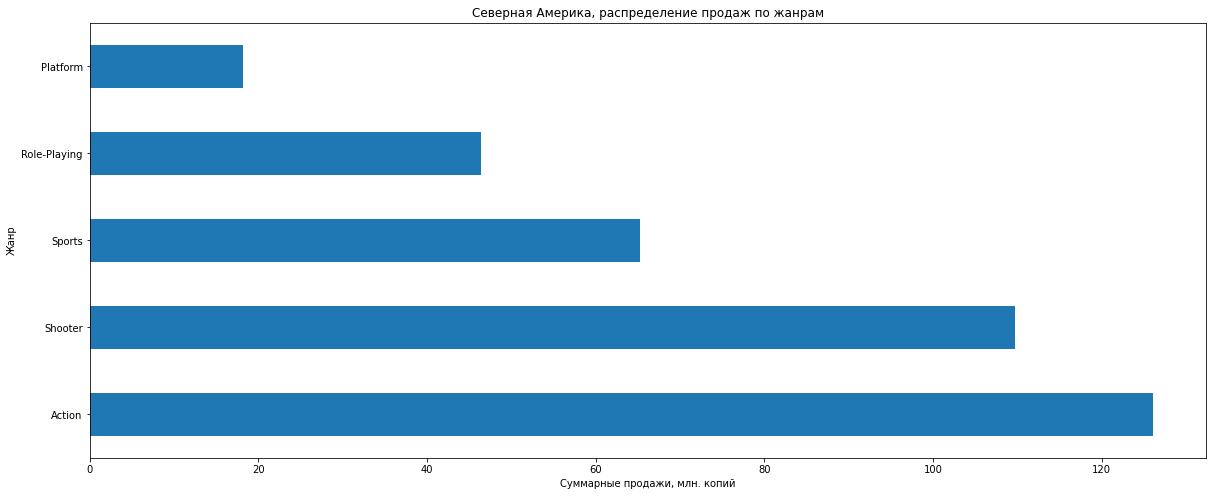

In [39]:
display(actual_data.query('genre != "Misc"').pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head())
actual_data.query('genre != "Misc"').pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head().plot(kind='barh', figsize=(20,8), legend=False)
plt.xlabel('Суммарные продажи, млн. копий')
plt.ylabel('Жанр')
plt.title('Северная Америка, распределение продаж по жанрам')
plt.xticks(rotation = 0)
plt.show()

Теперь на пятом месте жанр Platform.

Жанр Action довольно разнороден. Давайте посмотрим топ-10 игр в нем в каждом из двух регионов.

In [40]:
display('Топ-10 игр в Северной Америке')
display(actual_data.query('genre == "Action"').sort_values(by='na_sales', ascending=False).head(10))
display('Топ-10 игр в Европе')
display(actual_data.query('genre == "Action"').sort_values(by='eu_sales', ascending=False).head(10))

'Топ-10 игр в Северной Америке'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summary_sales
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
22,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
20,The Last of Us,PS3,2013,Action,2.41,2.18,0.28,0.99,95.0,9.1,M,5.86
55,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50
29,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86.0,8.1,T,4.62
63,Assassin's Creed IV: Black Flag,X360,2013,Action,1.90,1.11,0.01,0.29,86.0,7.9,M,3.31
28,The Last of Us,PS4,2014,Action,1.88,2.00,0.07,0.77,NaN,NaN,Unknown,4.72
30,Luigi's Mansion: Dark Moon,3DS,2013,Action,1.80,1.39,1.11,0.29,86.0,8.4,E,4.59


'Топ-10 игр в Европе'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summary_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
22,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
20,The Last of Us,PS3,2013,Action,2.41,2.18,0.28,0.99,95.0,9.1,M,5.86
45,Assassin's Creed: Unity,PS4,2014,Action,1.19,2.07,0.08,0.62,70.0,4.9,M,3.96
28,The Last of Us,PS4,2014,Action,1.88,2.00,0.07,0.77,NaN,NaN,Unknown,4.72
60,Assassin's Creed Syndicate,PS4,2015,Action,0.81,1.99,0.07,0.52,76.0,6.8,M,3.39
42,Watch Dogs,PS4,2014,Action,1.40,1.90,0.11,0.64,80.0,6.3,M,4.05
29,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86.0,8.1,T,4.62


В обоих топ-10 игры по сути своей тяготеют к жанру Shooter.

В целом, такое распеределение по жанрам соответствует превалированию в этих регионах "домашних" платформ.

              jp_sales
genre                 
Role-Playing     51.04
Action           40.49
Misc              9.20
Fighting          7.65
Shooter           6.61


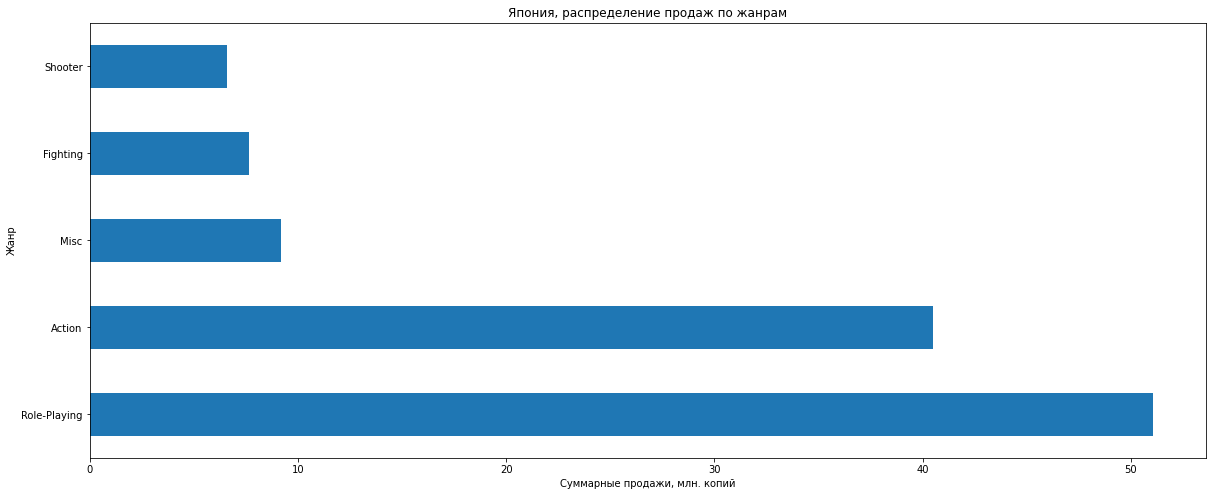

In [41]:
print(actual_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head())
actual_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head().plot(kind='barh', figsize=(20,8), legend=False)
plt.xlabel('Суммарные продажи, млн. копий')
plt.ylabel('Жанр')
plt.title('Япония, распределение продаж по жанрам')
plt.xticks(rotation = 0)
plt.show()

В Японии на первом месте идет жанр Role-playing, что в целом как раз подходит под более "портативное" распределение по платформам. На втором месте - жанр Action, топ-10 по которому мы посморим далее. На третьем месте обобщенная категория Misc, также посмотри распределение без нее.

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Fighting,7.65
Shooter,6.61
Adventure,5.82


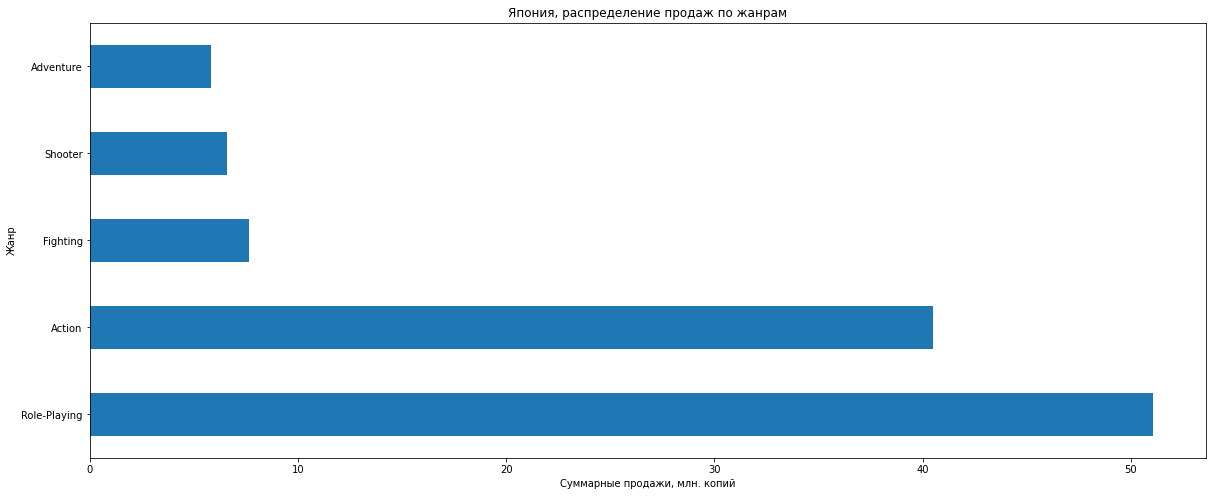

'Топ-10 игр жанра Action в Японии'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summary_sales
62,Monster Hunter X,3DS,2015,Action,0.27,0.21,2.79,0.05,NaN,NaN,Unknown,3.32
97,Yokai Watch Busters,3DS,2015,Action,0.00,0.00,2.29,0.00,NaN,NaN,Unknown,2.29
200,Yokai Watch 3,3DS,2016,Action,0.00,0.00,1.33,0.00,NaN,NaN,Unknown,1.33
30,Luigi's Mansion: Dark Moon,3DS,2013,Action,1.80,1.39,1.11,0.29,86.0,8.4,E,4.59
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
301,Monster Strike 3DS,3DS,2015,Action,0.00,0.00,0.87,0.00,NaN,NaN,Unknown,0.87
441,Yokai Sangokushi,3DS,2016,Action,0.00,0.00,0.56,0.00,NaN,NaN,Unknown,0.56
268,Pro Evolution Soccer 2014,PS3,2013,Action,0.03,0.41,0.51,0.00,78.0,4.1,E,0.95
59,Metal Gear Solid V: The Phantom Pain,PS4,2015,Action,1.09,1.36,0.49,0.48,93.0,8.2,M,3.42
477,Dragon Quest Heroes: The World's Tree Woe and ...,PS3,2015,Action,0.00,0.00,0.49,0.00,NaN,NaN,Unknown,0.49


In [42]:
display(actual_data.query('genre != "Misc"').pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head())
actual_data.query('genre != "Misc"').pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head().plot(kind='barh', figsize=(20,8), legend=False)
plt.xlabel('Суммарные продажи, млн. копий')
plt.ylabel('Жанр')
plt.title('Япония, распределение продаж по жанрам')
plt.xticks(rotation = 0)
plt.show()
display('Топ-10 игр жанра Action в Японии')
display(actual_data.query('genre == "Action"').sort_values(by='jp_sales', ascending=False).head(10))

Видно, что жанр Action в Японии отличается, в нем более популярны игры для портативных платформ.

В целом картина распределения по жанрам также соответствует распределению по платформам. Более популярны портативные Role-playing и Action, а скорее "домашние" Fighting и Shooter менее популярны. Adventure, который может относиться к обоим типам платформ, на пятом месте.

#### Влияние рейтинга ESRB

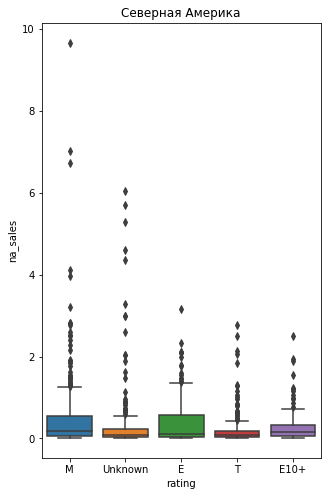

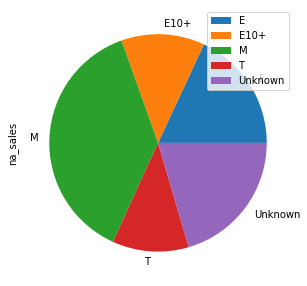

In [43]:
plt.rcParams['figure.figsize'] = (5,8)
sns.boxplot(x=actual_data.query('na_sales > 0')['rating'], y=actual_data.query('na_sales > 0')['na_sales'])
plt.title('Северная Америка')
plt.show()
actual_data.query('na_sales > 0').pivot_table(index='rating', values='na_sales', aggfunc='sum').plot(y='na_sales', kind='pie', figsize=(5,5))
plt.show()

В Северной Америке игры всех рейтингов могут добиться хороших продаж, прямой зависимости от рейтинга нет, но видно, что несколько игр с рейтингом "M" добились заметно лучшего результата, скорее всего это игры популярного там жанра Shooter и похожие на них игры из жанра Action. Посмотрим.

In [44]:
actual_data.query('rating == "M"').sort_values(by='na_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summary_sales
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
6,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
7,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
24,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
11,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
22,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
37,Call of Duty: Advanced Warfare,X360,2014,Shooter,2.77,1.11,0.00,0.40,NaN,4.9,M,4.28
65,Gears of War: Ultimate Edition,XOne,2015,Shooter,2.61,0.33,0.00,0.34,82.0,7.5,M,3.28


Большую часть рынка Северной Америки занимают игры рейтинга "M", у них также очень хорошие показатели прибыльности. Думаю, на такой результат работает популярность в регионе игр жанра Shooter и похожих на них игры из жанра Action.
    
На втором месте по популярности идут игры с рейтингом "E", к которым часто относятся игры жанра Sports, тоже довольно популярным в регионе. У игр с этим рейтингом тоже хорошие показатели прибыльности.
    
Два последних места - игры с регтингами "E10+" и "T". Прибыльность у них ниже остальных.
    
Около 20% рынка занимают игры без рейтинга, в рамках данного датафрейма мне это кажется ошибкой, насколько мне известно, наличие рейтинга по системе ESRB обязательно для начала продаж в Северной Америке.

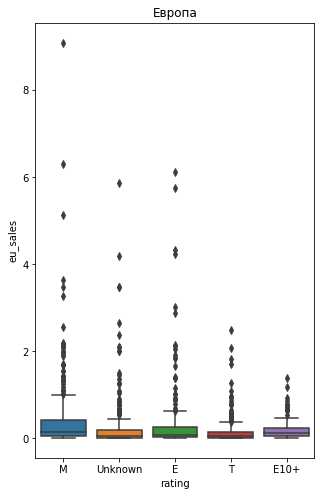

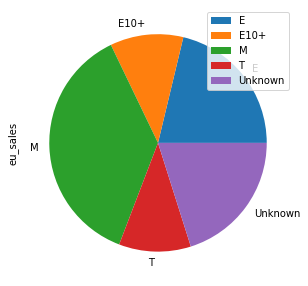

In [45]:
plt.rcParams['figure.figsize'] = (5,8)
sns.boxplot(x=actual_data.query('eu_sales > 0')['rating'], y=actual_data.query('eu_sales > 0')['eu_sales'])
plt.title('Европа')
plt.show()
actual_data.query('eu_sales > 0').pivot_table(index='rating', values='eu_sales', aggfunc='sum').plot(y='eu_sales', kind='pie', figsize=(5,5))
plt.show()

В Европе ситуация похожая, прямой зависимости нет, и также как и в Северной Америке есть выдающиеся игры с рейтингом "M" скорее всего относящиеся к жанрам Shooter или Action. Но и в рейтинге "E" появилось несколько игр с хорошими продажами, возможно это спортивные игры. Проверим.

In [46]:
actual_data.query('rating == "M"').sort_values(by='eu_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summary_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
7,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
11,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
15,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
6,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
22,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
20,The Last of Us,PS3,2013,Action,2.41,2.18,0.28,0.99,95.0,9.1,M,5.86
43,Far Cry 4,PS4,2014,Shooter,1.13,2.18,0.10,0.63,85.0,7.7,M,4.04


In [47]:
actual_data.query('rating == "E"').sort_values(by='eu_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summary_sales
9,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
12,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
19,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
18,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46
38,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,NaN,4.5,E,4.28
40,FIFA 14,X360,2013,Sports,0.92,2.89,0.01,0.40,84.0,4.2,E,4.22
17,Mario Kart 8,WiiU,2014,Racing,3.15,2.15,1.28,0.51,88.0,9.1,E,7.09
66,FIFA 16,XOne,2015,Sports,0.89,2.12,0.00,0.24,84.0,4.4,E,3.25
86,FIFA 17,XOne,2016,Sports,0.43,2.05,0.00,0.17,84.0,5.5,E,2.65
78,FIFA 15,X360,2014,Sports,0.79,1.92,0.00,0.21,NaN,4.2,E,2.92


В целом, распределение рынка очень похоже на рынок Северной Америки и выводы по нему будут те же. С той лишь разницей, что игры рейтинга "E" на рынке Европы показывают прибыльность ниже.

Здесь я вижу ту же проблему с играми без рейтинга. Учитывая, что в Европе применяется другая система рейтинга (PEGI) и есть возможность, что часть игр не продается в Северной Америке, но учитывая тождественность предпочтений пользователей этих двух рынков, вероятность, что эти игры будут оказывать такое сильное влияние на распределение продаж, мне видится низкой.

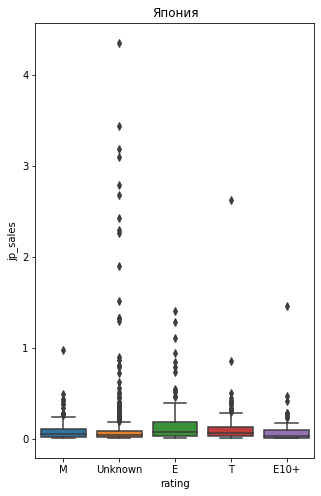

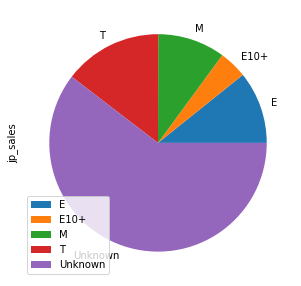

In [48]:
plt.rcParams['figure.figsize'] = (5,8)
sns.boxplot(x=actual_data.query('jp_sales > 0')['rating'], y=actual_data.query('jp_sales > 0')['jp_sales'])
plt.title('Япония')
plt.show()
actual_data.query('jp_sales > 0').pivot_table(index='rating', values='jp_sales', aggfunc='sum').plot(y='jp_sales', kind='pie', figsize=(5,5))
plt.show()

В Японии картина другая, большую часть рынка занимают игры без рейтинга ESRB. Учитывая, что предпочтения пользователей этого региона кардинально отличаются от других, можно предположить, что эту часть рынка формируют игры, выпущенные только для рынка Японии, и для них применяется только их рейтинговая система (CERO). Прибыльность игр с этим рейтингом в среднем невысокая, но это может быть влиянием плохо продающихся игр с не заполненным по ошибке рейтингом. На графике видно, что довольно много игр показывают хорошие результаты по продажам.

На втором месте по доле рынка идут игры с рейтингом "T", также у них неплохие показатели прибыльности.
    
Игры с рейтингом "M" и "E" занимают похожие доли рынка, но игры с рейтингом "E" более прибыльны.
    
На последнем месте по доле рынка игры с рейтингом "E10+", прибыльность у них низкая.

### Проверка гипотез

Необходимо проверить следующие гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза: средние значения оценок пользователей игр на платформах Xbox One и PC не различаются.

Альтернативная гипотеза: средние значения оценок пользователей игр на платформах Xbox One и PC различны.

За alpha возьмем стандартные 0,05.

Также, отсечем игры, в которых не указан рейтинг.

In [49]:
alpha = 0.05
xone_scores = actual_data.query('platform == "XOne" and user_score == user_score')['user_score']
pc_scores = actual_data.query('platform == "PC" and user_score == user_score')['user_score']
results_xone_pc = st.ttest_ind(xone_scores, pc_scores, equal_var = False)

if results_xone_pc.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу не получилось отвергнуть. Возможно, причина в том, что на этих платформах много игр, вышедших на них обоих.

In [50]:
cross = 0
for i in actual_data.query('platform == "XOne" and user_score == user_score')['name'].unique():
    if i in actual_data.query('platform == "PC" and user_score == user_score')['name'].unique():
        cross += 1
        
print('Количество оцененных игр на Xbox One', len(actual_data.query('platform == "XOne" and user_score == user_score')['name'].unique()))
print('Количество оцененных игр на PC', len(actual_data.query('platform == "PC" and user_score == user_score')['name'].unique()))
print('Количество пересекающихся игр', cross)

Количество оцененных игр на Xbox One 182
Количество оцененных игр на PC 155
Количество пересекающихся игр 78


Действительно, таких игр довольно много. Попробуем отвергнуть нулевую гипотезу с параметром equal_var равным True.

In [51]:
results_xone_pc = st.ttest_ind(xone_scores, pc_scores, equal_var = True)

if results_xone_pc.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


Статистически значимой разницы между оценками пользователей на платформах Xbox One и PC нет.

#### Средние пользовательские рейтинги жанров Action и Sports разные

Нулевая гипотеза: средние значения оценок пользователей игр жанров Action и Sports не различаются.

Альтернативная гипотеза: средние значения оценок пользователей игр жанров Action и Sports различны.

За alpha возьмем стандартные 0,05.

Также, отсечем игры, в которых не указан рейтинг.

In [52]:
alpha = 0.05
action_scores = actual_data.query('genre == "Action" and user_score == user_score')['user_score']
sports_scores = actual_data.query('genre == "Sports" and user_score == user_score')['user_score']
results_action_sports = st.ttest_ind(action_scores, sports_scores, equal_var = False)

if results_action_sports.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


Выборки по умолчанию разные, дополнительной проверки не требуется.
Статистически значимая разница между оценками пользователей игр в жанрах Action и Sports есть. Принимаем альтернативную гипотезу.

### Общий вывод

При построении стратегии продаж на 2017 год стоит учитывать, что предпочтения пользователей различаются в зависимости от региона.

Для Северной Америки и Европы жанровый набор игр и платформ похожий - лучше всего продаются игры жанров  Action, Shooter и Sports, выпущенные для "домашних" платформ, также, в этих регионах большую долю рынка и хорошую прибыльность показывают игры с рейтингом "M" по системе ESRB.

А для Японии картина будет кардинально другой - больше всего продаж в жанрах Role-playing и Action для портативных платформ. Ориентироваться на рейтинг ESRB для данного рынка тяжело, поскольку большую часть рынка занимают игры без него, возможно ориентированные только на японский рынок.

Если взять обобщенные данные, то за последние 4 года растущими являются платформы PlayStation 4 и Xbox One.

Лучше всего продаются игры жанров Action, Shooter, Role-Playing и Sports. Причем лучшую прибыльность показывают Shooter.

Также стоит обратить внимание на игры, хорошо оцененные критиками, поскольку их оценки определенно влияют на продажи.